In [10]:
# worksheet for figures from "Intra-urban temperature variability in Baltimore"

# works with:
# pandas version 0.18.0
# numpy version 1.11.0
# matplotlib version 1.5.1
# import data
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import matplotlib
import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = 16, 12
import pandas as pd
pd.options.display.mpl_style = 'default'
get_ipython().magic(u'matplotlib inline')
#import ibuttonplots
#import importibuttondata
#import cartopy.crs as ccrs
#from cartopy.io.img_tiles import MapQuestOSM

# files = glob.glob('./data/*[tT].csv')
# meta0 = pd.DataFrame(pd.read_csv('./data/falldownload/TempSensorFinal_results-4.csv', sep = ','))
# #pd.DataFrame(pd.read_csv('./data/bmoremetadata.csv', sep = ','))
# tempDF0, anomalyDF0, meta0 = importibuttondata.importdata(files, meta0)

# #files = glob.glob('./data/*[tT].csv')
# files = glob.glob('./data/falldownload/*[tT].csv')
# meta1 = pd.DataFrame(pd.read_csv('./data/falldownload/TempSensorFinal_results-4.csv', sep = ','))
# #meta0 = pd.DataFrame(pd.read_csv('./data/bmoremetadata.csv', sep = ','))
# tempDF1, anomalyDF1, meta1 = importibuttondata.importdata(files, meta1)

# frames = [tempDF0, tempDF1]
# tempDF = pd.concat(frames)
# anomalyDF = pd.concat([anomalyDF0, anomalyDF1])
# meta = pd.concat([meta0, meta1.loc()[np.setdiff1d(meta1.sensornumber, meta0.sensornumber)]])

#meta = pd.DataFrame(pd.read_csv('./data/falldownload/TempSensorFinal_results-4.csv', sep = ','))
meta = pd.DataFrame(pd.read_csv('data/CleanedMeta2016.csv', sep = ','))
meta = meta.set_index('sensornumber', drop = False)
meta = meta.set_index(meta.index.astype(int), drop = False)
#mean_temp = pd.read_csv('meantemp.csv', header=-1).rename(columns = {0: 'SensorNumber', 1:'MeanTemp'}).set_index('SensorNumber')
tempDF = pd.read_csv('data/CleanedTemp2016.csv', parse_dates = [0]).set_index('Date').resample('H').first()
tempDF.columns = tempDF.columns.astype(int)

#subset to sensors that were available at a certain date
#junesensors = np.where(~np.isnan(tempDF['2015-06-15'].iloc[0])==1)
#tempDF = tempDF.iloc[:, junesensors[0]]
#meta = meta.loc[tempDF.columns]

# Import Science Center observation data
# date_spec = {'Date': [2, 3]}
# urbandf = pd.read_csv('data/2138216847366dat.csv', 
#                       sep = ',', 
#                       parse_dates = {'Date':[2, 3]},
#                       #parse_dates = ['YYYYMMDD', 'HHM'],
#                       keep_date_col=True).set_index('Date')
# #urbandf.Temp[urbandf.Temp == '****'] = 'NaN' # replace stars with nans
# urbandf.Temp = (urbandf.Temp.astype('float')) #-32)*5/9. #change the data to float
# urbandf.Temp[urbandf.Temp > 400] = 'NaN' #change unrealistic temp data to nan, data in F so 400 too high
# urbandf = urbandf[~((urbandf.index.month == 2) & (urbandf.index.day == 29))] # get rid of leap years
# #df.DEWP[df.DEWP == '****'] = 'NaN' # replace stars with nans
# #df.DEWP = df.DEWP.astype('float') #change the data to float
# #urbandf = urbandf.resample('H')
# urbandf.rename(columns = {'Temp' : 'TEMP'}, inplace = True)
# urbandf.index = urbandf.index - pd.DateOffset(hours  = 4)

# import sqlite3

# conn = sqlite3.connect('data/olinhall-weewx.sdb')
# olinhalldf = pd.read_sql_query('SELECT * from archive', conn)
# olinhalldf['dateTime']=pd.to_datetime(olinhalldf['dateTime'], unit='s')
# olinhalldf.outTemp = (olinhalldf.outTemp-32)*5./9.
# olinhalldf = olinhalldf.set_index('dateTime')
# olinhalldf.index = olinhalldf.index - pd.DateOffset(hours  = 5)

# #amazinggracedf = amazinggracedf.resample('H')
#olinhalldf = olinhalldf.resample('H')

# categorize sensors
ebaltsensorsi = np.where(meta['location:Longitude']>= -76.6125831)#-76.61)# -76.6072591 )
parksi = np.where((meta['landcoverclass'] != 'impervious') & (meta['location:Longitude']>= -76.6125831)) # -76.61) )

parksensors = meta.index[parksi]#meta.sensornumber.iloc[parksi]
ebaltsensors = meta.index[ebaltsensorsi]# meta.sensornumber.iloc[ebaltsensorsi]
nonparks = np.setdiff1d(ebaltsensors, parksensors)
selected = meta.index#np.intersect1d(tempDF.columns.astype(int), ebaltsensors)

parksensors = np.intersect1d(tempDF.columns, parksensors)
nonparks = np.intersect1d(tempDF.columns, nonparks)

pylab.rcParams['font.family'] = 'serif' 
pylab.rcParams['font.size'] = 14
pylab.rcParams['axes.titlesize'] = 22

startdate = '2016-06-15'
enddate = '2016-09-15'

/Users/ascott47/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2885: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  exec(code_obj, self.user_global_ns, self.user_ns)


In [11]:
import ulmo
scicenter = ulmo.ncdc.ghcn_daily.get_data('USW00093784', as_dataframe=True)
urbandf = pd.DataFrame()
urbandf['TMAX'] = scicenter['TMAX'].value.astype(float)*.1
urbandf['TMIN'] = scicenter['TMIN'].value.astype(float)*.1

/Users/ascott47/anaconda3/lib/python3.5/site-packages/ulmo/ncdc/ghcn_daily/core.py:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  axis=1)
/Users/ascott47/anaconda3/lib/python3.5/site-packages/ulmo/ncdc/ghcn_daily/core.py:95: FutureWarning: .resample() is now a deferred operation
use .resample(...).mean() instead of .resample(...)
  daily_index = element_df.resample('D').index.copy()


In [16]:
import sqlite3

conn = sqlite3.connect('data/weewx.sdb')
olinhalldf = pd.read_sql_query('SELECT * from archive', conn)
olinhalldf['dateTime']=pd.to_datetime(olinhalldf['dateTime'], unit='s')
olinhalldf.outTemp = (olinhalldf.outTemp-32)*5./9.
olinhalldf = olinhalldf.set_index('dateTime')
olinhalldf.index = olinhalldf.index - pd.DateOffset(hours  = 5)

In [ ]:
conn = sqlite3.connect('data/olinhall-weewx.sdb') # june 6, 2015 - june 15, 2015
test = pd.read_sql_query('SELECT * from archive', conn)
test['dateTime']=pd.to_datetime(test['dateTime'], unit='s')
test = test.set_index('dateTime')


conn = sqlite3.connect('data/olinhall-weewx2.sdb') # june 6, 2016 - june 15, 2015
test2 = pd.read_sql_query('SELECT * from archive', conn)
test2['dateTime']=pd.to_datetime(test2['dateTime'], unit='s')
test2 = test2.set_index('dateTime')

In [ ]:
urbandf.index

In [ ]:
urbandf['2016-05-01':'2016-07-01']['TMIN'].plot()
tempDF.resample('D').min().mean(axis=1).plot()

In [23]:
tempDF[97]['2016-06-14':'2016-06-27'].resample('D').min()

Date
2016-06-14    21.495
2016-06-15    20.870
2016-06-16    23.996
2016-06-17    20.808
2016-06-18    24.309
2016-06-19    25.121
2016-06-20    22.746
2016-06-21    20.745
2016-06-22    20.182
2016-06-23    21.808
2016-06-24    21.871
2016-06-25    21.370
2016-06-26    20.870
2016-06-27    19.932
Freq: D, Name: 97, dtype: float64

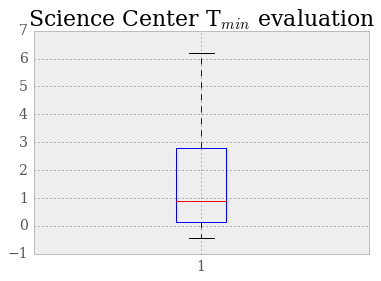

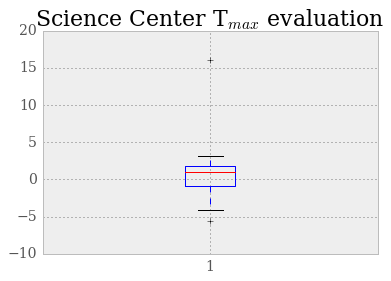

In [33]:
#urbandf['2016-05-01':'2016-07-01']['TMIN'].plot()
handle = plt.boxplot(tempDF[97]['2016-06-14':'2016-06-27'].resample('D').min().values - urbandf['2016-06-14':'2016-06-27']['TMIN'].values)
plt.title('Science Center T$_{min}$ evaluation')

plt.figure()
handle = plt.boxplot(tempDF[97]['2016-06-14':'2016-06-27'].resample('D').max().values - urbandf['2016-06-14':'2016-06-27']['TMAX'].values)
plt.title('Science Center T$_{max}$ evaluation')

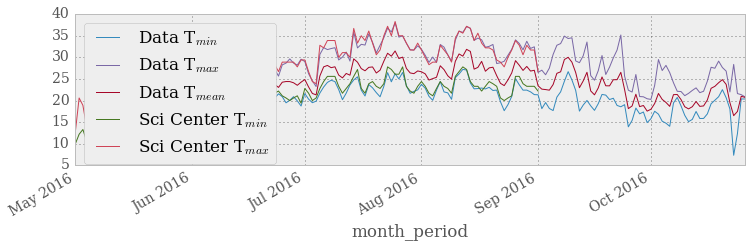

In [19]:
plt.figure(figsize=[12,3])
plt.plot(tempDF.resample('D').min().mean(axis=1), label = 'Data T$_{min}$')
plt.plot(tempDF.resample('D').max().mean(axis=1), label = 'Data T$_{max}$')
plt.plot(tempDF.resample('D').mean().mean(axis=1), label = 'Data T$_{mean}$')
urbandf['TMIN']['2016-05-01':'2016-09-01'].plot(label= 'Sci Center T$_{min}$')
urbandf['TMAX']['2016-05-01':'2016-09-01'].plot(label= 'Sci Center T$_{max}$')
plt.legend(loc = 2)

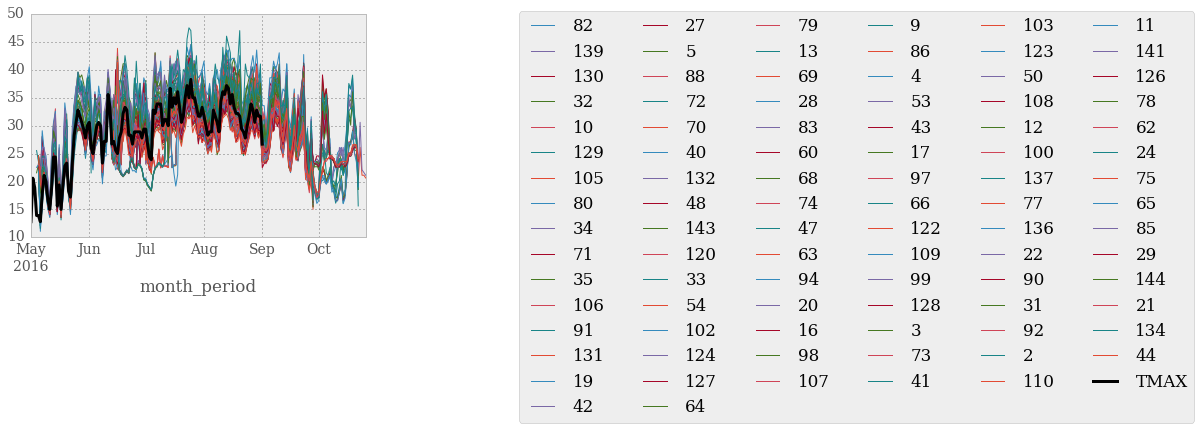

In [20]:
tempDF.resample('D').max().plot()
urbandf['2016-05-01':'2016-09-01']['TMAX'].plot(color = 'k', lineWidth = 3)
plt.legend(bbox_to_anchor=(3.5, 1.05), ncol = 6)

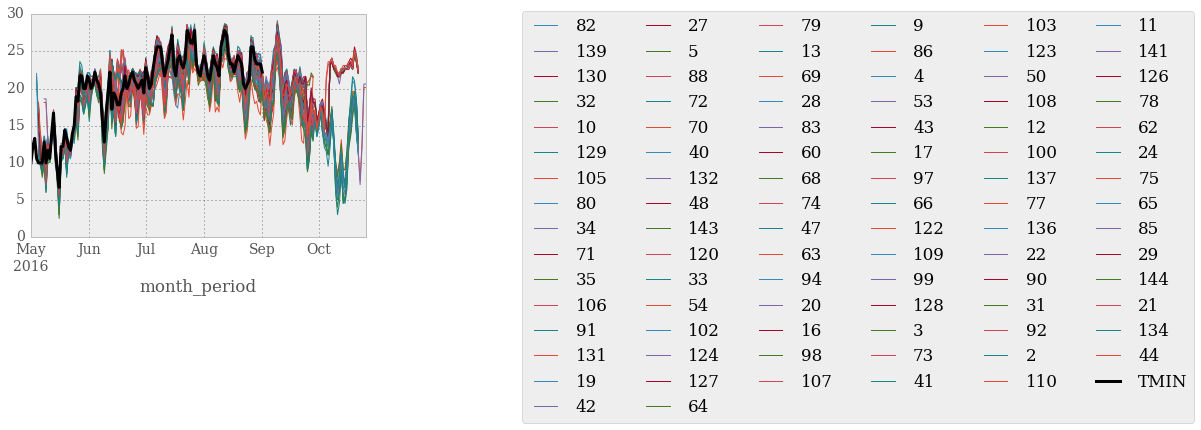

In [22]:
tempDF.resample('D').min().plot()
urbandf['2016-05-01':'2016-09-01']['TMIN'].plot(color = 'k', lineWidth = 3)
plt.legend(bbox_to_anchor=(3.5, 1.05), ncol = 6)

In [28]:
def prettify_plot(): 
    ""'Hides top and rightmos axis spines and also some other stuff. '""
    figures = [x for x in matplotlib._pylab_helpers.Gcf.get_all_fig_managers()]
    for figure in figures:
        # Get all Axis instances related to the figure.
        for ax in figure.canvas.figure.get_axes():
            # Disable spines.
            ax.spines['right'].set_color('none')
            ax.spines['top'].set_color('none')
            # Disable ticks.
            ax.xaxis.set_ticks_position('bottom')
            ax.yaxis.set_ticks_position('left')
    
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.set_axis_bgcolor('none')
    plt.grid(b=False, which='major')

def easy_scatter(x,y,title, xlabel, ylabel) : 
# plots x,y (need to be np array) and calculates and prints their best fit line
    ind = ~np.isnan(y) & ~np.isnan(x) # subset values that aren't NaNs
    m,b = np.polyfit(x[ind],y[ind],1)
    r, p = scipy.stats.pearsonr(x[ind], y[ind]) #np.corrcoef(x[ind],y[ind])[0,1]
    plt.scatter(x,y, color = 'grey')
    plt.plot(x, m*x+b, color = 'black')
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    # annotate the linear reqression, y = mx+b
    plt.annotate('y = %.2f x + %.2f'%(m,b), xy=(.5, .9), xycoords='axes fraction',  horizontalalignment='left', verticalalignment='bottom')
    plt.annotate('r = %.2f'%(r), xy=(.5, .8), xycoords='axes fraction',  horizontalalignment='left', verticalalignment='bottom')
    plt.annotate('p = %.2f'%(p), xy=(.5, .7), xycoords='axes fraction',  horizontalalignment='left', verticalalignment='bottom')
    plt.annotate('N = %i'%(ind.shape), xy=(.5, .6), xycoords='axes fraction',  horizontalalignment='left', verticalalignment='bottom')
    return m, r, p

    
def mapmean(tempDF, meta, name = '', option = 0):
        import cartopy.crs as ccrs
        from cartopy.io.img_tiles import GoogleTiles
        from mpl_toolkits.axes_grid1 import make_axes_locatable
        #fig  = plt.figure(figsize=(30, 30))
        x = meta['location:Longitude'].values
        y = meta['location:Latitude'].values
        c = tempDF[meta.index].mean()
        marker_size = 350
        imagery = GoogleTiles()
        fig = plt.figure(figsize=[15,15])
        ax = plt.axes(projection=imagery.crs)

        ax.set_extent(( meta['location:Longitude'].min()-.005,
                   meta['location:Longitude'].max()+.005 ,
                   meta['location:Latitude'].min()-.005,
                   meta['location:Latitude'].max()+.005))
        ax.add_image(imagery, 14)

        cmap = matplotlib.cm.OrRd
        bounds = np.linspace(round((c.mean()-3)),round((c.mean()+3)),13)
        norm = matplotlib.colors.BoundaryNorm(bounds, cmap.N)
        plotHandle = ax.scatter(x,y,c = c, s = marker_size, transform=ccrs.Geodetic(),
                 cmap = cmap,
                 norm = norm)

        if option ==0 :
            cbar1 = plt.colorbar(plotHandle, label = 'Temperature in $^\circ $C', orientation = 'horizontal')
        else :
            cbar1 = plt.colorbar(plotHandle, label = option, orientation ='horizontal')

        lon = x[np.nanargmax(c)]
        lat = y[np.nanargmax(c)]
        at_x, at_y = ax.projection.transform_point(lon, lat,
                                               src_crs=ccrs.Geodetic())
        plt.annotate(
        '%2.1f'%np.nanmin(c.values), xy=(at_x, at_y), #xytext=(30, 20), textcoords='offset points',
        color='black', size = 22, backgroundcolor='none')

        plt.annotate(
        '$\mu = $ %2.1f, $\sigma = $ %2.1f'%(np.nanmean(c.values), np.nanstd(c.values)), (0.01,0.01), xycoords ='axes fraction', #xytext=(30, 20), textcoords='offset points',
        color='black', size = 22, backgroundcolor='none')

        plt.title('Mean Temperature %s'%name)
        filename = './plots/meantempmap%s.eps'%name
        plt.savefig(filename, format = 'eps', dpi = 600)

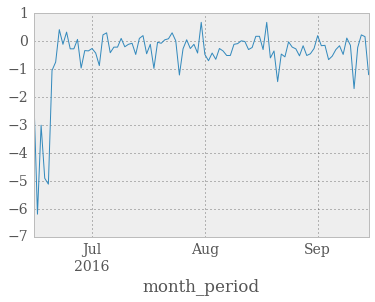

In [24]:
(urbandf['TMIN'][startdate:enddate]- tempDF[97][startdate:enddate].resample('D').min()).plot()

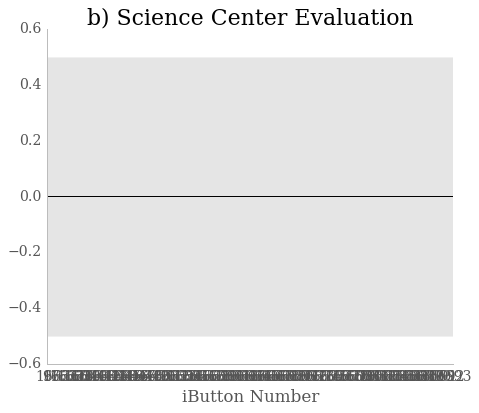

In [29]:
# For T_min 

startdate = '2015-07-20'
enddate = '2015-09-15'
fig = plt.figure(figsize=[16,6])
# Olin Hall
# plt.subplot(1,2,1)
# buttons = [1, 51, 18, 14] #[90, 107, 86, 53, 35, 20]
# handle = (tempDF[startdate:enddate].resample('D').min()[buttons].subtract(olinhalldf[startdate:enddate].outTemp.resample('D').min(), axis=0)).boxplot(return_type='axes')
# plt.title('a) Olin Hall Evaluation')
# plt.xlabel('iButton Number')
# plt.ylabel('Difference with Station ($^\circ C$)')
# plt.axhline(0, color = 'black')
# plt.axhspan(-.5,.5, facecolor='0.8', alpha=0.5)
# #plt.ylim([-2,2])
# prettify_plot()

# downtown station (Maryland Science Center)
plt.subplot(1,2,2)
buttons = [97] #, 18, 92]
handle = (tempDF[startdate:enddate].resample('D').min()[buttons].subtract(urbandf[startdate:enddate]['TMIN']).boxplot(return_type='axes'))
plt.title('b) Science Center Evaluation')
plt.xlabel('iButton Number')
#plt.ylim([-2,2])
plt.axhline(0, color = 'black')
plt.axhspan(-.5,.5, facecolor='0.8', alpha=0.5)

prettify_plot()
#plt.savefig('plots/evaluationboxplot.pdf', dpi = 300)
#print 'number of measurements:', tempDF[startdate:enddate].resample('D').min()[buttons].shape

number of measurements: (63, 3)


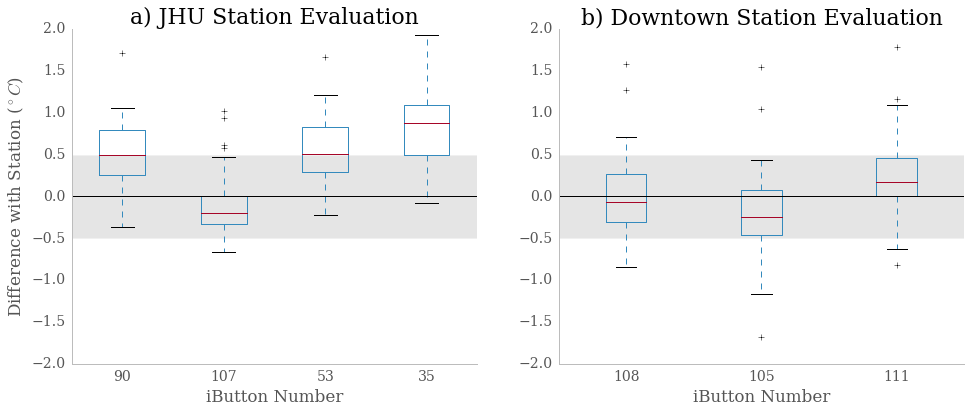

In [4]:
# For T_min 

#startdate = '2015-07-10'
#enddate = '2015-09-15'
fig = plt.figure(figsize=[16,6])
# Olin Hall
plt.subplot(1,2,1)
buttons = [90, 107, 53, 35] #[90, 107, 86, 53, 35, 20]
handle = (tempDF[startdate:enddate].resample('D').min()[buttons].subtract(olinhalldf[startdate:enddate].outTemp.resample('D').min(), axis=0)).boxplot(return_type='axes')
plt.title('a) JHU Station Evaluation')
plt.xlabel('iButton Number')
plt.ylabel('Difference with Station ($^\circ C$)')
plt.axhline(0, color = 'black')
plt.axhspan(-.5,.5, facecolor='0.8', alpha=0.5)
plt.ylim([-2,2])
prettify_plot()

# downtown station (Maryland Science Center)
plt.subplot(1,2,2)
buttons = [108, 105, 111] #, 18, 92]
handle = (tempDF[startdate:enddate].resample('D').min()[buttons].subtract(urbandf[startdate:enddate].TEMP.resample('D').min(), axis=0)).boxplot(return_type='axes')
plt.title('b) Downtown Station Evaluation')
plt.xlabel('iButton Number')
plt.ylim([-2,2])
plt.axhline(0, color = 'black')
plt.axhspan(-.5,.5, facecolor='0.8', alpha=0.5)

prettify_plot()
plt.savefig('plots/evaluationboxplot.pdf', dpi = 300)
print('number of measurements:', tempDF[startdate:enddate].resample('D').min()[buttons].shape)

In [71]:
print('Mean non park temp: ', tempDF[startdate:enddate][nonparks].resample('D').min().mean().mean(), 
      'Mean park temp: ', tempDF[startdate:enddate][parksensors].resample('D').min().mean().mean())

('Mean non park temp: ', 23.112848896434627, '\n', 'Mean park temp: ', 22.231982875348468)


In [67]:
#Results: compute statistics 
#perform a t-test
from scipy import stats
stats.ttest_ind(tempDF[startdate:enddate][nonparks].resample('D').min().mean().dropna(), 
                #tempDF[startdate:enddate][nonparks].resample('D', how = 'min').mean(), 
                     tempDF[startdate:enddate][parksensors].resample('D').min().mean().dropna(),
                     equal_var = False)

Ttest_indResult(statistic=4.3571568928046593, pvalue=7.7906956188662262e-05)

/Users/annascott2/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).min()
  if __name__ == '__main__':
/Users/annascott2/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).max()
  from ipykernel import kernelapp as app


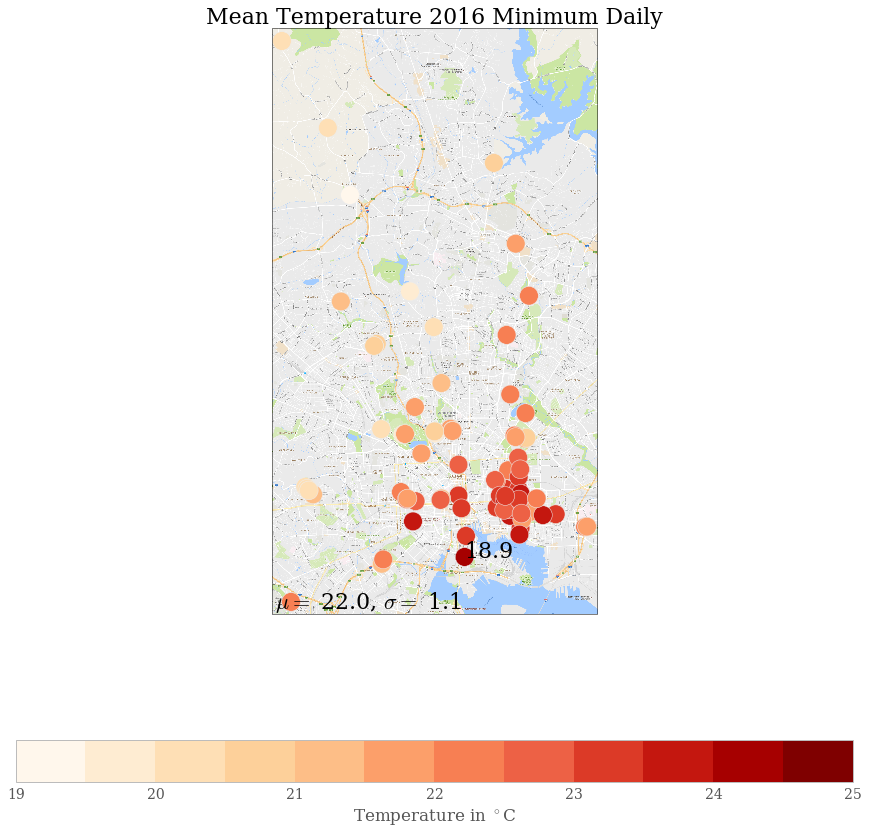

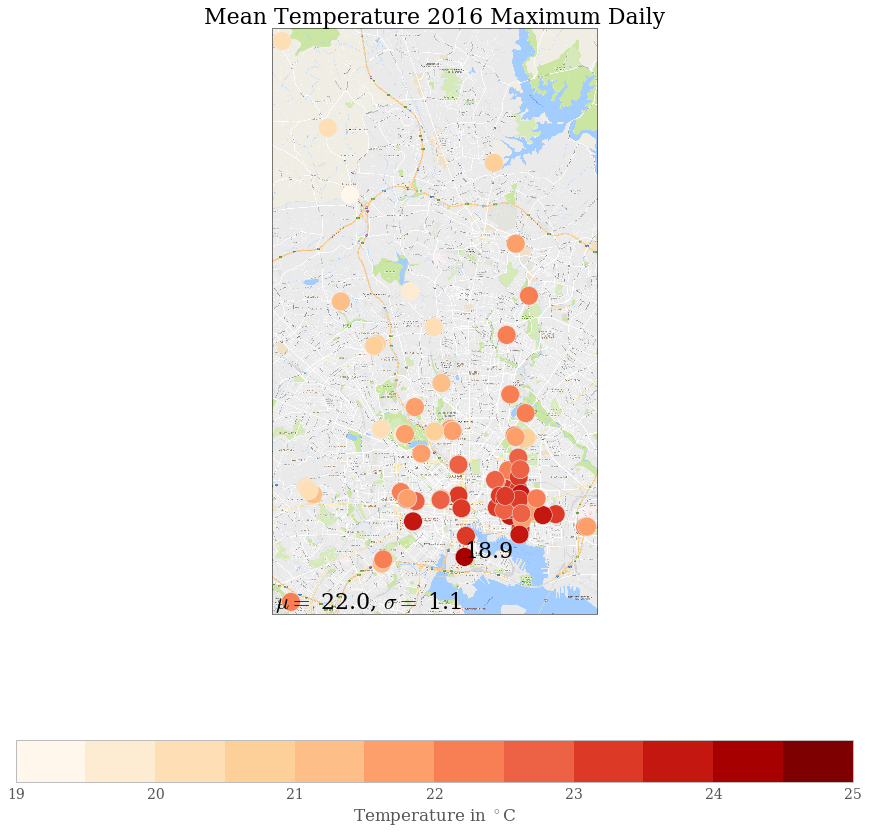

In [76]:
mapmean(tempDF[startdate:enddate].resample('D', how = 'min'), meta, name = '2016 Minimum Daily')
mapmean(tempDF[startdate:enddate].resample('D', how = 'max'), meta, name = '2016 Maximum Daily')

In [31]:
meta[(meta['landcoverclass']!= 'grass') & (meta['attachment']!= 'tree')]

,sensornumber,meta:instanceID,oldsensornumber,location:Latitude,location:Longitude,location:Altitude,location:Accuracy,direction,sunorshade,attachment,landcoverclass,vesasitenumber,vesacategory,picture,time,shield,notes
sensornumber,,,,,,,,,,,,,,,,,
41,41.0,uuid:62b4f390-f4a7-40e2-9246-b520c5653b8d,41,39.27029,-76.655005,-8.0,4.0,0.0,sun,metal,dirt,17.0,o,https://bmorecoolodk.appspot.com/view/binaryDa...,Sat May 07 14:28:11 UTC 2016,foil,nothingtoadd
136,136.0,uuid:8c9deedc-5e6b-4a64-ab65-f71356e8ec07,136,NaN,NaN,NaN,NaN,0.0,shade,deadwood,dirt,NaN,NaN,https://bmorecoolodk.appspot.com/view/binaryDa...,Mon Jul 18 19:55:57 UTC 2016,basic,"Forest behind cement wall, greektown"


In [652]:
meta[(meta['attachment']!= 'tree')]

,sensornumber,meta:instanceID,oldsensornumber,location:Latitude,location:Longitude,location:Altitude,location:Accuracy,direction,sunorshade,attachment,landcoverclass,vesasitenumber,vesacategory,picture,time,shield,notes
sensornumber,,,,,,,,,,,,,,,,,
139,139.0,uuid:29523146-79ce-47b8-bcf6-3b8ee53fa055,139,39.285206,-76.548337,15.0,9.000,0.0,sun,metal,grass,NaN,NaN,https://bmorecoolodk.appspot.com/view/binaryDa...,Mon Jul 18 20:02:53 UTC 2016,basic,nothingtoadd
10,10.0,uuid:259a9063-407e-4c12-bc9a-963aa4af5c69,10,39.290396,-76.582468,5.0,8.000,0.0,sun,metal,grass,6.0,o,https://bmorecoolodk.appspot.com/view/binaryDa...,Fri May 06 20:31:10 UTC 2016,basic,Half impervious half turf
35,35.0,uuid:6bc0ce81-52f5-4f33-95f3-bd794edac977,35,39.303822,-76.595326,9.0,6.000,0.0,sun,deadwood,grass,15.0,o,https://bmorecoolodk.appspot.com/view/binaryDa...,Fri May 06 16:21:47 UTC 2016,foil,nothingtoadd
19,19.0,uuid:630ebc51-e796-42f6-9797-cc50c4c7ad7a,19,39.324417,-76.618496,35.0,4.000,0.0,sun,metal,grass,19.0,o,https://bmorecoolodk.appspot.com/view/binaryDa...,Thu May 05 21:58:03 UTC 2016,foil,Wyman park dell open
42,42.0,uuid:99cf2d42-0327-43b7-9939-46cf92de5658,42,39.320797,-76.579794,7.0,4.000,0.0,sun,deadwood,grass,2.0,o,https://bmorecoolodk.appspot.com/view/binaryDa...,Fri May 06 13:31:53 UTC 2016,foil,nothingtoadd
27,27.0,uuid:2caf58a4-ca8e-47fa-a400-05c32f8bb808,27,39.291191,-76.577985,-23.0,5.000,0.0,sun,metal,grass,7.0,o,https://bmorecoolodk.appspot.com/view/binaryDa...,Fri May 06 20:42:08 UTC 2016,basic,nothingtoadd
5,5.0,uuid:2435cc97-630c-43a0-af3c-d1e6f0a7b0ec,5,39.324256,-76.654926,85.0,5.000,0.0,sun,metal,grass,12.0,o,https://bmorecoolodk.appspot.com/view/binaryDa...,Thu May 05 17:05:16 UTC 2016,basic,Druid hill baseball field North
40,40.0,uuid:c9fdfbd1-05ab-42ce-b673-74a8172c7fe7,40,39.288006,-76.582108,-35.0,5.000,0.0,sun,deadwood,grass,5.0,o,https://bmorecoolodk.appspot.com/view/binaryDa...,Fri May 06 21:11:40 UTC 2016,basic,NaN
132,132.0,uuid:59ea1446-3139-4295-ab86-78b3522610d9,132,39.291130,-76.577852,-9.0,5.000,0.0,sun,metal,grass,NaN,NaN,https://bmorecoolodk.appspot.com/view/binaryDa...,Mon Jul 18 20:27:52 UTC 2016,basic,nothingtoadd


In [36]:
no_trees.shape[0]

25

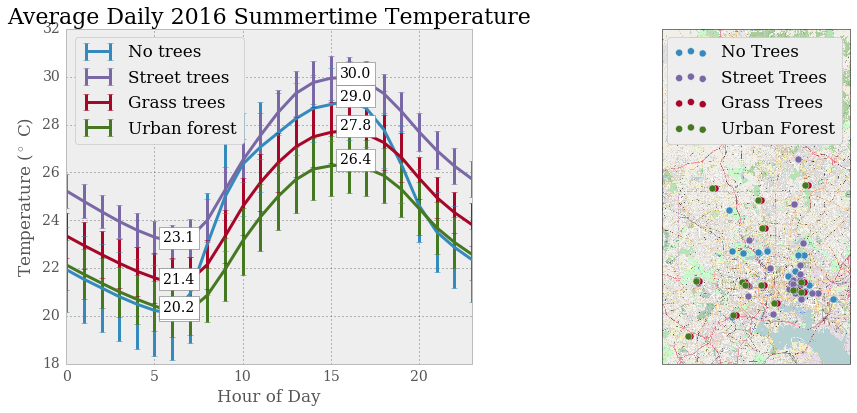

In [33]:
no_trees = meta[(meta['attachment']!= 'tree')].index
urban_forest = meta[(meta['landcoverclass'] == 'dirt') & (meta['attachment']== 'tree')].index
street_trees = meta[(meta['landcoverclass'] == 'impervious') & (meta['attachment']== 'tree')].index
grass_trees = meta[(meta['landcoverclass'] == 'grass') & (meta['attachment']== 'tree')].index
labels = ['Park, No trees', 'Street trees', 'Grass trees', 'Urban forest']
i = 0

import cartopy.crs as ccrs
from cartopy.io.img_tiles import OSM
imagery = OSM()

plt.figure(figsize=[16,6])
ax1 = plt.subplot(1,2,1)

ax2 = plt.subplot(1,2,2,projection=imagery.crs )

for trees in [no_trees, street_trees, grass_trees, urban_forest]: 
    tempDF[trees].groupby(tempDF[trees].index.hour).mean().mean(axis=1).plot(linewidth = 3,
                    yerr= tempDF[trees].groupby(tempDF[trees].index.hour).mean().std(axis=1),
                    label = labels[i])
    plt.text(15.5, tempDF[trees].groupby(tempDF[trees].index.hour).mean().mean(axis=1).max(),
    '%2.1f'%tempDF[trees].groupby(tempDF[trees].index.hour).mean().mean(axis=1).max(),
     bbox=dict(facecolor='white', edgecolor = '#636363')
     )
    plt.text(5.5,tempDF[trees].groupby(tempDF[trees].index.hour).mean().mean(axis=1).min(),
     '%2.1f'%tempDF[trees].groupby(tempDF[trees].index.hour).mean().mean(axis=1).min(),
     bbox=dict(facecolor='white', edgecolor = '#636363')
     )
    
    ax2.scatter(meta.loc[no_trees]['location:Longitude'].values, 
           meta.loc[no_trees]['location:Latitude'].values, transform=ccrs.Geodetic(), 
           label = 'Park, no Trees (N=%2i)'%no_trees.shape[0],s = 50, c= pd.tools.plotting._get_standard_colors(3)[0])
    i = i+1

plt.legend(loc=2)
plt.title('Average Daily 2016 Summertime Temperature')
plt.xlabel('Hour of Day')
plt.ylabel('Temperature ($^\circ$ C)')

import cartopy.crs as ccrs
from cartopy.io.img_tiles import OSM
imagery = OSM()
#ax = plt.axes(projection=imagery.crs)
ax = plt.subplot(1,2,2,projection=imagery.crs )
ax.scatter(meta.loc[no_trees]['location:Longitude'].values, 
           meta.loc[no_trees]['location:Latitude'].values, transform=ccrs.Geodetic(), 
           label = 'Park, no Trees (N=%2i)'%no_trees.shape[0],s = 50, c= pd.tools.plotting._get_standard_colors(3)[0])
ax.scatter(meta.loc[street_trees]['location:Longitude'].values, 
           meta.loc[street_trees]['location:Latitude'].values, transform=ccrs.Geodetic(), 
           label = 'Street Trees (N=%2i)'%stree_trees.shape[0],s = 50, c= pd.tools.plotting._get_standard_colors(3)[1])
ax.scatter(meta.loc[grass_trees]['location:Longitude'].values+0.003,
           meta.loc[grass_trees]['location:Latitude'].values, transform=ccrs.Geodetic(), 
           label = 'Grass Trees',s = 50, c =  pd.tools.plotting._get_standard_colors(3)[2])
ax.scatter(meta.loc[grass_trees]['location:Longitude'].values,
           meta.loc[grass_trees]['location:Latitude'].values, transform=ccrs.Geodetic(), 
           label = 'Urban Forest',s = 50, c =  pd.tools.plotting._get_standard_colors(3)[3])
#ax.set_extent(ax.get_extent())
ax.add_image(imagery, 14)
plt.legend()
plt.savefig('plots/diurnaltemptrees.pdf')

In [51]:
no_trees = meta[(meta['attachment']!= 'tree')& (meta['landcoverclass']!= 'grass')].index

In [52]:
no_trees

Int64Index([41, 136], dtype='int64', name='sensornumber')

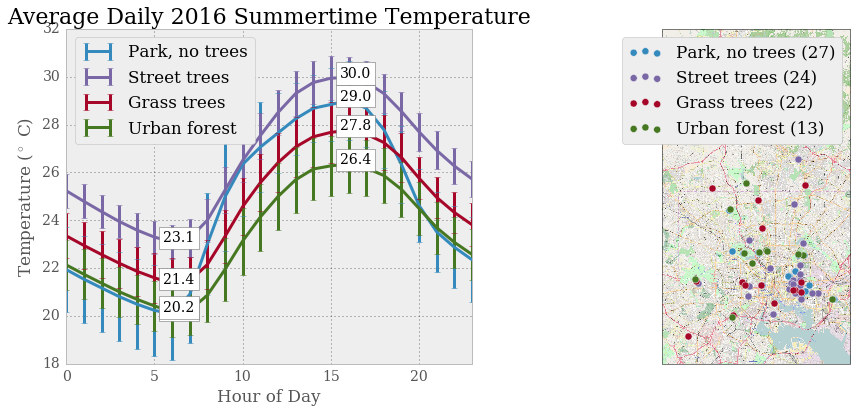

In [59]:
park_no_trees = meta[(meta['attachment']!= 'tree')].index
urban_forest = meta[(meta['landcoverclass'] == 'dirt') & (meta['attachment']== 'tree')].index
street_trees = meta[(meta['landcoverclass'] == 'impervious') & (meta['attachment']== 'tree')].index
grass_trees = meta[(meta['landcoverclass'] == 'grass') & (meta['attachment']== 'tree')].index
labels = ['Park, no trees', 'Street trees', 'Grass trees', 'Urban forest']
i = 0

import cartopy.crs as ccrs
from cartopy.io.img_tiles import OSM
imagery = OSM()

fig = plt.figure(figsize=[16,6])
ax1 = plt.subplot(1,2,1)

ax2 = plt.subplot(1,2,2,projection=imagery.crs )

for trees in [park_no_trees, street_trees, grass_trees, urban_forest]: 
    tempDF[trees].groupby(tempDF[trees].index.hour).mean().mean(axis=1).plot(ax = ax1, linewidth = 3,
                    yerr= tempDF[trees].groupby(tempDF[trees].index.hour).mean().std(axis=1),
                    label = labels[i])
    ax1.text(15.5, tempDF[trees].groupby(tempDF[trees].index.hour).mean().mean(axis=1).max(),
    '%2.1f'%tempDF[trees].groupby(tempDF[trees].index.hour).mean().mean(axis=1).max(),
     bbox=dict(facecolor='white', edgecolor = '#636363')
     )
    ax1.text(5.5,tempDF[trees].groupby(tempDF[trees].index.hour).mean().mean(axis=1).min(),
     '%2.1f'%tempDF[trees].groupby(tempDF[trees].index.hour).mean().mean(axis=1).min(),
     bbox=dict(facecolor='white', edgecolor = '#636363')
     )
    
    ax2.scatter(meta.loc[trees]['location:Longitude'].values, 
           meta.loc[trees]['location:Latitude'].values, transform=ccrs.Geodetic(), 
           label = labels[i]+ ' (%2i)'%trees.shape[0],s = 50, 
                c= pd.tools.plotting._get_standard_colors(3)[i])
    i = i+1
    
ax1.legend(loc=2)
ax1.set_title('Average Daily 2016 Summertime Temperature')
ax1.set_xlabel('Hour of Day')
ax1.set_ylabel('Temperature ($^\circ$ C)')

ax2.legend()
ax2.add_image(imagery, 14)
fig.savefig('plots/diurnaltemptrees.pdf')

/Users/ascott47/git/IntraUrbanTemperatureVariabilityBaltimore


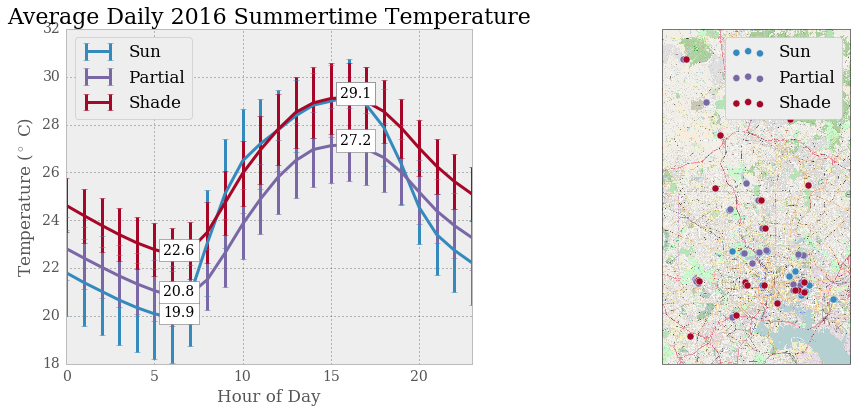

In [34]:
# plot difference between sun and no sun
no_trees = meta[(meta['sunorshade']== 'sun')].index
urban_forest = meta[(meta['sunorshade'] == 'partial')].index
street_trees = meta[(meta['sunorshade'] == 'shade')].index
#grass_trees = meta[(meta['landcoverclass'] == 'grass') & (meta['attachment']== 'tree')].index
labels = ['Sun', 'Partial', 'Shade']
i = 0
plt.figure(figsize=[16,6])
plt.subplot(1,2,1)
for trees in [no_trees, street_trees, urban_forest]: 
    tempDF[trees].groupby(tempDF[trees].index.hour).mean().mean(axis=1).plot(linewidth = 3,
                    yerr= tempDF[trees].groupby(tempDF[trees].index.hour).mean().std(axis=1),
                    label = labels[i])
    plt.text(15.5, tempDF[trees].groupby(tempDF[trees].index.hour).mean().mean(axis=1).max(),
    '%2.1f'%tempDF[trees].groupby(tempDF[trees].index.hour).mean().mean(axis=1).max(),
     bbox=dict(facecolor='white', edgecolor = '#636363')
     )
    plt.text(5.5,tempDF[trees].groupby(tempDF[trees].index.hour).mean().mean(axis=1).min(),
     '%2.1f'%tempDF[trees].groupby(tempDF[trees].index.hour).mean().mean(axis=1).min(),
     bbox=dict(facecolor='white', edgecolor = '#636363')
     )
    i = i+1

plt.legend(loc=2)
plt.title('Average Daily 2016 Summertime Temperature')
plt.xlabel('Hour of Day')
plt.ylabel('Temperature ($^\circ$ C)')

import cartopy.crs as ccrs
from cartopy.io.img_tiles import OSM
imagery = OSM()
#ax = plt.axes(projection=imagery.crs)
ax = plt.subplot(1,2,2,projection=imagery.crs )

ax.scatter(meta.loc[no_trees]['location:Longitude'].values, 
           meta.loc[no_trees]['location:Latitude'].values, transform=ccrs.Geodetic(), label = 'Sun',s = 50, c= pd.tools.plotting._get_standard_colors(3)[0])
ax.scatter(meta.loc[street_trees]['location:Longitude'].values, 
           meta.loc[street_trees]['location:Latitude'].values, transform=ccrs.Geodetic(), label = 'Partial',s = 50, c= pd.tools.plotting._get_standard_colors(3)[1])
ax.scatter(meta.loc[grass_trees]['location:Longitude'].values+0.003,
           meta.loc[grass_trees]['location:Latitude'].values, transform=ccrs.Geodetic(), label = 'Shade',s = 50, c =  pd.tools.plotting._get_standard_colors(3)[2])
#ax.set_extent(ax.get_extent())
ax.add_image(imagery, 14)
plt.legend()

/Users/ascott47/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:14: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).min()
/Users/ascott47/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:17: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).min()
/Users/ascott47/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:21: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).min()
/Users/ascott47/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:25: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).min()
/Users/ascott47/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:43: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).min()
/Users/ascott47/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:44: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).min(

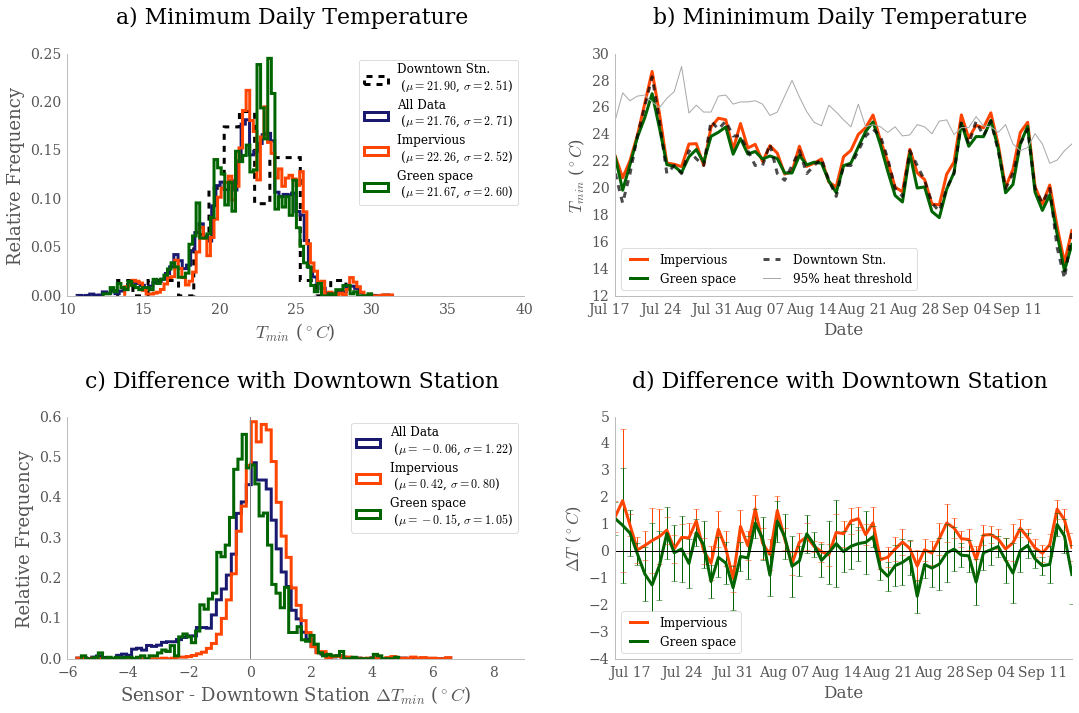

In [4]:
ninetyfifth = np.load('data/minT95thpercentileMDSCiCenter.npy')
#startdate = '2015-07-01' 
import matplotlib.dates as mdates
fig = plt.figure(figsize=[18,12])
M = 75 
purple = 'orangered'#'fuchsia'#'orangered'
green = '#006400'
blue = 'midnightblue' #cyan
#parksensors = np.intersect1d(tempDF.columns, parksensors)
#nonparks = np.intersect1d(tempDF.columns, nonparks)
legendfontsize = 12
ax = fig.add_subplot(221)

data = urbandf[startdate:enddate]['TEMP'].resample('D', how = 'min')
n,bins, patches= ax.hist(data,15, histtype='step', normed=1, weights= (np.ones(data.shape)*25), linewidth = 3, color = 'black', linestyle=('dashed'), label = 'Downtown Stn. \n ($\mu = %2.2f$, $\sigma = %2.2f$)'%(data.mean(), data.std()))

data = tempDF[startdate:enddate].resample('D', how = 'min').values
data = data[~np.isnan(data)] 
n,bins, patches= ax.hist(data,M, histtype='step',normed=1,  linewidth = 3, color = blue, label = 'All Data \n ($\mu = %2.2f$, $\sigma = %2.2f$)'%(data.mean(), data.std()))

data = tempDF[startdate:enddate][np.intersect1d(tempDF.columns, nonparks)].resample('D', how = 'min').values
data = data[~np.isnan(data)] 
n,bins, patches= ax.hist(data,M, histtype='step', normed=1, linewidth = 3, color = purple,label = 'Impervious \n ($\mu = %2.2f$, $\sigma = %2.2f$)'%(data.mean(), data.std()))

data = tempDF[startdate:enddate][np.intersect1d(tempDF.columns, parksensors)].resample('D', how = 'min').values
data = data[~np.isnan(data)] 
n,bins, patches= ax.hist(data,M, histtype='step', normed=1, linewidth = 3, color = green, label = 'Green space \n ($\mu = %2.2f$, $\sigma = %2.2f$)'%(data.mean(), data.std()))

#data = urbandf[startdate:enddate]['TEMP'].resample('D', how = 'min')
#n,bins, patches= ax.hist(data,M, histtype='step', linewidth = 3, color = 'black', label = 'NWS Station ($\mu = %2.2f$, $\sigma = %2.2f$)'%(data.mean(), data.std()))

#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol = 1)
plt.xlim([10, 40])
plt.legend(loc='upper right', fontsize=legendfontsize).get_frame().set_facecolor('white')
plt.title('a) Minimum Daily Temperature \n ', fontsize = 22)
plt.xlabel('$T_{min}$ ($^\circ C$)', fontsize=18)
plt.ylabel('Relative Frequency', fontsize=18)
prettify_plot()

ax = fig.add_subplot(222)
# plot temp plot 
#minthresh = (np.load('BWImindailytempthresholds.npy') -32) *5/9.
x = tempDF[startdate:enddate].resample('D',how = 'min').index.to_pydatetime()
ax.plot(x,tempDF[startdate:enddate].resample('D', how = 'min')[nonparks].mean(axis=1), purple, label = 'Impervious',  linewidth = 3)
ax.plot(x, tempDF[startdate:enddate].resample('D', how = 'min')[parksensors].mean(axis=1), color = green,label = 'Green space', 
         linewidth = 3)

urbandf[startdate:enddate].resample('D', how = 'min').TEMP.plot(style ='--k', label = 'Downtown Stn.', linewidth = 3, alpha = .7)

#plt.plot(x, minthresh[1][tempDF[startdate:enddate].resample('D', how='min').index.dayofyear-1],
#         color = 'gray', linewidth = 1, label = '95% heat threshold')
plt.plot(x, ninetyfifth[tempDF[startdate:enddate].resample('D', how='min').index.dayofyear-1],
         color = 'darkgray', linewidth = 1, label = '95% heat threshold')
plt.legend(loc='lower left', ncol = 2, fontsize=legendfontsize).get_frame().set_facecolor('white')

ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
plt.xticks(rotation=0)
plt.title('b) Mininimum Daily Temperature \n')
plt.ylabel('$T_{min}$ ($^\circ C$)')
prettify_plot()


ax = fig.add_subplot(223)
#intra-urban histogram
plt.axvline(0, color ='grey')

diff = tempDF[startdate:enddate].resample('D', how = 'min').subtract(urbandf[startdate:enddate].resample('D', how = 'min').TEMP, axis=0)
data = diff.values
data = data[~np.isnan(data)] 
n,bins, patches= ax.hist(data,M, histtype='step', normed=1, linewidth = 3,  color = blue, label = 'All Data \n ($\mu = %2.2f$, $\sigma = %2.2f$)'%(data.mean(), data.std()))

data = diff[nonparks].values
data = data[~np.isnan(data)] 
n,bins, patches= ax.hist(data,M, histtype='step',  normed=1,linewidth = 3, color = purple, label = 'Impervious \n ($\mu = %2.2f$, $\sigma = %2.2f$)'%(data.mean(), data.std()))

data = diff[parksensors].values
data = data[~np.isnan(data)] 
n,bins, patches= ax.hist(data,M, histtype='step',  normed=1, linewidth = 3, color = green,label = 'Green space \n ($\mu = %2.2f$, $\sigma = %2.2f$)'%(data.mean(), data.std()))

plt.legend( fontsize=legendfontsize).get_frame().set_facecolor('white')
plt.xlabel('$\Delta T_{u}$ ($^\circ C$)', fontsize=18)
plt.ylabel('Probability', fontsize=18)
plt.legend(fontsize=legendfontsize).get_frame().set_facecolor('white')
plt.title('c) Difference with Downtown Station \n  ', fontsize = 22)
plt.xlabel('Sensor - Downtown Station $\Delta T_{min}$ ($^\circ C$)', fontsize=18)
plt.ylabel('Relative Frequency', fontsize=18)
plt.xlim([-6,9])
prettify_plot()

ax = fig.add_subplot(224)
plt.errorbar(diff.index, diff[nonparks].mean(axis=1), yerr = diff[nonparks].std(axis=1), color = purple)
plt.plot(diff.index, diff[nonparks].mean(axis=1), 
         label = 'Impervious',
         linewidth = 3, color = purple)
plt.errorbar(diff.index, diff[parksensors].mean(axis=1),yerr = diff[parksensors].std(axis=1),
    linewidth = 1, color = green)
plt.plot(diff.index, diff[parksensors].mean(axis=1), label = 'Green space', linewidth = 3,  
         color = green)
plt.axhline(0, color ='k')
lgd = plt.legend(selected, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol = 2, fontsize=legendfontsize)
plt.legend(fontsize=legendfontsize, loc = 'lower left').get_frame().set_facecolor('white')
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol = 1)
plt.title('d) Difference with Downtown Station \n')
plt.ylabel('$\Delta T$ ($^\circ C$)')
#plt.text('2015-07-15', -2.5, '$ \mu_{Green} = %2.2f$'%diff[parksensors].mean(axis=1).mean(), 
#         fontsize = 18)
#plt.text('2015-07-15', -3.5, '$ \mu_{Imperv} = %2.2f$'%diff[nonparks].mean(axis=1).mean(), 
#         fontsize = 18)
plt.ylim([-4,5])
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
prettify_plot()
plt.xlabel('Date')

plt.savefig('plots/PDFtimeseries.pdf', dpi = 300)

In [8]:
(tempDF[startdate:enddate].resample('D', how = 'min')[nonparks].mean(axis=1) -tempDF[startdate:enddate].resample('D', how = 'min')[parksensors].mean(axis=1)
).mean()

/Users/ascott47/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).min()
  if __name__ == '__main__':


0.5590647722475716

In [104]:
startdate = '2015-07-15'
#, enddate

/Users/ascott47/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:7: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).min()


ValueError: operands could not be broadcast together with shapes (57,) (125,) 

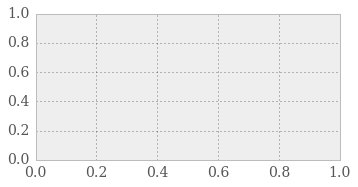

In [64]:
import string
from scipy.stats import pearsonr
startdate = '2016-07-15'
enddate = '2016-09-15'
#UHI =  tempDF[startdate:enddate].resample('D', how = 'min')-ruraldf[startdate:enddate].resample('D', how = 'min').TEMP
#UHI = UHI.mean(axis=1)
Intra =  tempDF[selected][startdate:enddate].resample('D').min().subtract(urbandf[startdate:enddate].resample('D', how = 'min')['TMIN'],
                                                                          axis=0)#tempDF[startdate:enddate].resample('D', how = 'min')-urbandf[startdate:enddate].resample('D', how = 'min').TEMP
IntraStd = Intra.std(axis=1)
Intra = Intra.mean(axis=1)
#MeanTemp = tempDF[selected][startdate:enddate].resample('D', how = 'min').mean(axis=1)
units = {'outTemp':' $^\circ C$', 'windSpeed': 'm/s', 'pressure': 'hPa', 'radiation': '$W/m^2$'}
nameDict= {'outTemp': 'Temp.', 'windSpeed': 'Wind', 'pressure': 'Pressure', 'radiation': 'Radiation'}
n = 1
fig1 = plt.figure(figsize=[12,14.4])
for variable in ['outTemp', 'windSpeed', 'pressure', 'radiation']: 
    plt.subplot(4,2,n)
    try: 
        
        plt.subplot(4,2,n)
        x = olinhalldf[startdate:enddate][variable].resample('D').mean()
        r, p = pearsonr(x[0:-1], Intra[1:])
        plt.scatter(x[0:-1], Intra[1:])
        plt.xlabel(nameDict[variable] + ' (' + units[variable]+ ')')
        #plt.xlabel('Difference with Station $\Delta T_{min}$')
        plt.annotate('$r=$%.2f'%r,xy=(.8, .9), xycoords ='axes fraction')
        plt.annotate('$p=$%.3f'%p,xy=(.8, .8), xycoords ='axes fraction')
        plt.title(string.ascii_lowercase[n-1] + ')', loc='left')
        plt.ylabel('$\overline{\Delta T}$  ($^\circ C$)')
        #plt.legend(['$r=$%.2f'%np.corrcoef(Intra[1:],x[0:-1])[0,1]], loc ='upper left').get_frame().set_facecolor('white')
        prettify_plot()
        
        plt.subplot(4,2,n+1)
        r,p = pearsonr(x[0:-1],IntraStd[1:])
        plt.scatter(x[0:-1],IntraStd[1:])
        plt.xlabel(nameDict[variable] + ' (' + units[variable]+ ')')
        plt.ylabel('$\sigma_{\Delta T}$  ($^\circ C$)')
        #plt.ylabel('Mean %s'%variable)
        #plt.xlabel('Std. Dev. of Difference with Station')
        #plt.legend(['$r=$%.2f'%np.corrcoef(IntraStd[1:],x[0:-1])[0,1]], loc ='upper left').get_frame().set_facecolor('white')                
        plt.title(string.ascii_lowercase[n] + ')', loc='left')
        plt.annotate('$r=$%.2f'%r,xy=(.8, .9), xycoords ='axes fraction')
        plt.annotate('$p=$%.3f'%p,xy=(.8, .8), xycoords ='axes fraction')

        prettify_plot()

#         plt.scatter(UHI[1:],x[0:-1])
#         plt.ylabel('Mean %s'%variable)
#         plt.xlabel('UHI $\Delta T_{min}$')
#         plt.legend(['$r=$%.2f'%np.corrcoef(UHI[1:],x[0:-1])[0,1]], loc ='upper left').get_frame().set_facecolor('white')
#         prettify_plot()
        
    except IndexError: 
                print('error: cannot map %s'%variable )
    except KeyError : 
            print('error: cannot map %s'%variable    )
    #n = n+1
    n= n+2

# plt.subplot(4,2,7)    
# plt.ylabel('$\overline{\Delta T}$  ($^\circ C$)')

# plt.subplot(4,2,8)    
# plt.xlabel('$\sigma_{\Delta T}$  ($^\circ C$)')

plt.subplot(4,2,1)    
plt.title('Difference from \n Downtown Station')

plt.subplot(4,2,2)    
plt.title('Spatial Variability \n within East Baltimore')
plt.savefig('plots/timescatterplot.pdf', dpi = 300)    

In [80]:
# figure 8
# compute possible co-variates for regression with mean temeprature
import spatialfunctions
from osgeo import ogr, osr
import gdal 
import scipy.stats
import shapely.geometry
import shapely.wkt

lon = meta['location:Longitude'][selected].values
lat = meta['location:Latitude'][selected].values

# feature_file = 'data/Parks_Dissolved_reproj.shp'
# distance_to_park = spatialfunctions.compute_distance_to_feature(lon,lat,feature_file, feature_name = 'none')

rasterfile = 'data/BaltimoreDEM'
elevation = spatialfunctions.extract_raster_values(lon,lat, rasterfile)

# compute LST
#rasterfile ='../satellite/LC80150332015229LGN00_B10.TIF' 
#band10 = spatialfunctions.extract_raster_values(lon,lat, rasterfile)
#LST = spatialfunctions.band10_toLST(band10)
rasterfile = 'data/atm_cor_10_LC80150332015229.tif'
LST = spatialfunctions.extract_raster_values(lon,lat, rasterfile)

# compute tree canopy cover 
rasterfile = 'data/TreeBaltimore_CanopyCover.img'
tree_cover = spatialfunctions.extract_raster_values(lon,lat, rasterfile)
tree_cover20ft = spatialfunctions.extract_raster_values(lon, lat, rasterfile,2,2, how = 'density')
tree_cover50ft = spatialfunctions.extract_raster_values(lon, lat, rasterfile,5,5, how = 'density')
tree_cover100ft = spatialfunctions.extract_raster_values(lon, lat, rasterfile,10,10, how = 'density')
tree_cover500ft = spatialfunctions.extract_raster_values(lon, lat, rasterfile,50,50, how = 'density')
#tree_cover = spatialfunctions.extract_raster_values(lon,lat, rasterfile)

# Compute albedo 
path = 'data/LC80150332015229LGN00/'
B = np.ones((5,lon.shape[0]))*np.nan
# Import bands and convert to reflectance 
for i in (1,2,3,4,5): 
    file = path+ 'LC80150332015229LGN00_B'+'%s'%i +'.TIF'
    DN = spatialfunctions.extract_raster_values(lon,lat,file)
    # convert from digital number to toa reflectance  using : rho*\lambda = REFLECTANCE_MULT_BAND_x*DN +REFLECTANCE_ADD_BAND_x
    reflectance_mult_band = 2.000e-5
    reflectance_add_band  = -0.100000
    B[i-1, :] = reflectance_mult_band*DN+reflectance_add_band

ndvi = (B[4,:]- B[3,:])/(B[4,:]+ B[3,:]) # (b5-b4)/(b5+b4) or nir-red/(nir+red )
alb = spatialfunctions.albedo(B[0,:], B[1,:], B[2,:], B[3,:], B[4,:], )
alb[alb>1] = 'NaN'
alb[alb<0] = 'NaN'
mean_temp = tempDF[selected].resample('D').min().mean()

TypeError: in method 'Geometry_Transform', argument 2 of type 'OSRCoordinateTransformationShadow *'

(-2.9695946386874241, -0.34032308306782061, 0.001643901891619238)

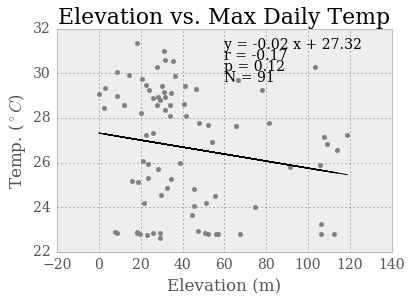

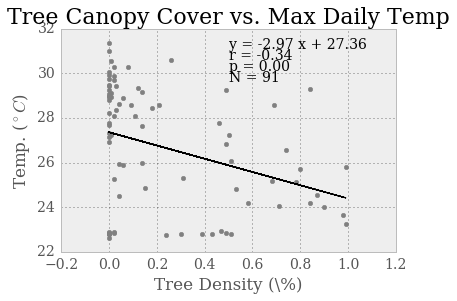

In [531]:
easy_scatter(elevation, tempDF.resample('D').max().mean()[meta.index].values, 
             'Elevation vs. Max Daily Temp', 
              'Elevation (m)', 'Temp. ($^\circ C$)',)
plt.figure()
easy_scatter(tree_cover100ft, tempDF.resample('D').max().mean()[meta.index].values, 
             'Tree Canopy Cover vs. Max Daily Temp', 
              'Tree Density (%)', 'Temp. ($^\circ C$)',)

In [ ]:
for trees, radius in zip([tree_cover, tree_cover20ft, tree_cover50ft, tree_cover100ft, tree_cover500ft], [0,20,50,100,500]): 
    plt.figure()
    easy_scatter(tempDF, trees, 'Temp vs. %i Ft Tree Density'%radius, 'elevation', 'Tree Density (Radius of %i ft)'%radius)

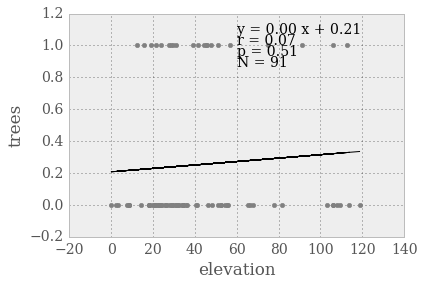

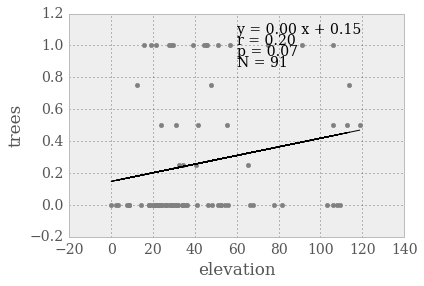

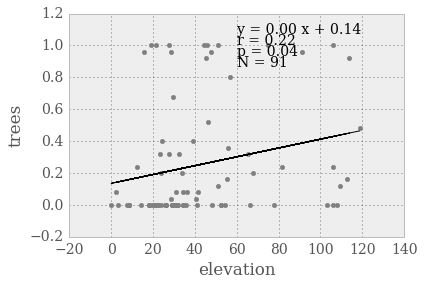

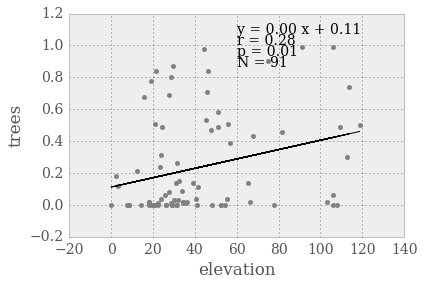

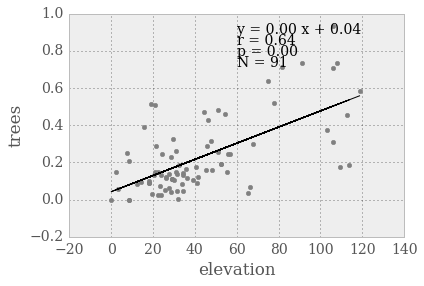

In [540]:
for trees in [tree_cover, tree_cover20ft, tree_cover50ft, tree_cover100ft, tree_cover500ft]: 
    plt.figure()
    easy_scatter(elevation, 
                 trees, '', 'elevation', 'trees')

In [562]:
alldf

,Albedo,Distance To Park,Elevation,LST,MaxTemp,MeanTemp,MinTemp,Tree Canopy
sensornumber,,,,,,,,
82,0.108129,8.733070e+01,113.811424,41.792740,26.549267,22.949512,19.352067,0.74
139,0.124728,6.819767e+02,26.021055,41.695087,22.827133,22.102278,21.576733,0.00
130,0.088215,6.659560e+03,NaN,35.460739,22.809333,22.113519,21.588400,NaN
32,0.081810,0.000000e+00,45.694683,38.617340,24.033352,20.123127,16.249167,0.71
10,0.099286,0.000000e+00,35.600731,39.693748,30.541556,22.483322,16.086241,0.01
129,0.086049,1.074476e+02,50.898594,40.471001,22.840267,22.137289,21.614600,0.49
105,0.122356,1.618235e+02,20.801702,42.798374,29.732933,25.067606,21.617733,0.00
80,0.127253,6.252121e+02,22.608877,42.129612,29.459133,24.784956,21.443733,0.00
34,0.088163,0.000000e+00,55.458912,38.915733,24.517333,20.358922,16.547278,0.04


In [570]:
distance_to_park[distance_to_park>100000] = np.nan
alldf = pd.DataFrame({"MaxTemp":  tempDF.resample('D').max().mean().loc[meta.index],
                      "MinTemp":  tempDF.resample('D').min().mean().loc[meta.index],
                      "MeanTemp":  tempDF.resample('D').mean().mean().loc[meta.index],
                      "Elevation": elevation, 
                   "LST": LST, "Distance To Park": distance_to_park, 
                   "Albedo": alb, #"inPark":parkyesno[indices], 
                  #"trees10ft": tree_cover[indices],# "trees20ft": tree_cover20ft[indices], "trees50ft": tree_cover50ft[indices], 
                   "Tree Canopy": tree_cover100ft,# "trees500ft": tree_cover500ft[indices]
                         })

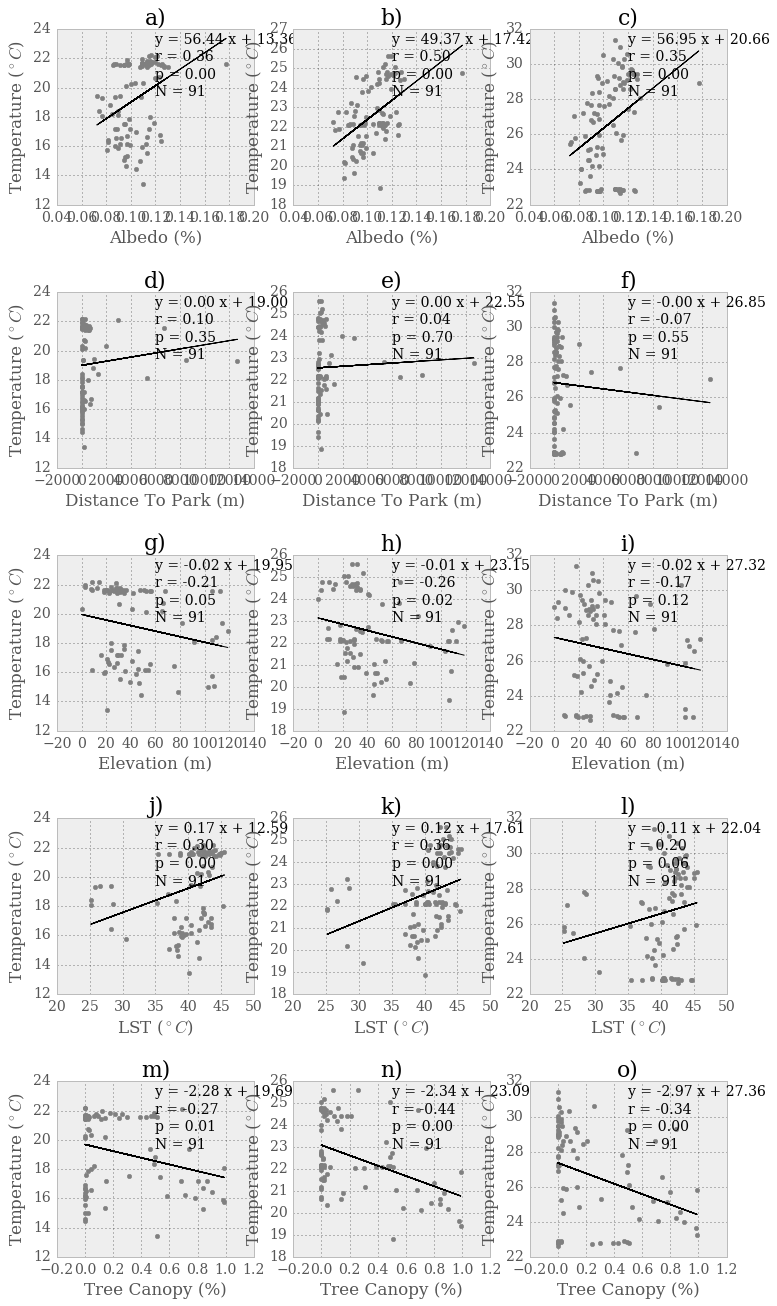

In [584]:
import string
plt.figure(figsize=[12,22])
n = 1
units = {'Elevation': 'm', 'LST': '$^\circ C$', 'Albedo': '%', 'Distance To Park': 'm', 'Tree Canopy': '%'}

for variable in ['Albedo', 'Distance To Park', 'Elevation', 'LST', 'Tree Canopy']: 
    plt.subplot(5,3,n)
    easy_scatter(alldf[variable], 
                 alldf['MinTemp'],
                 string.ascii_lowercase[n-1] + ')', 
                 variable + ' (' + units[variable]+ ')', 
                 'Temperature ($^\circ C$)')
    #prettify_plot()
    plt.subplot(5,3,n+1)
    easy_scatter(alldf[variable], 
                 alldf['MeanTemp'],
                 string.ascii_lowercase[n] + ')', 
                 variable + ' (' + units[variable]+ ')', 
                 'Temperature ($^\circ C$)') 
    plt.subplot(5,3,n+2)
    easy_scatter(alldf[variable], 
                 alldf['MaxTemp'],
                 string.ascii_lowercase[n+1] + ')', 
                 variable + ' (' + units[variable]+ ')', 
                 'Temperature ($^\circ C$)')
    n = n+3

In [672]:
meta.loc[selected]['sensornumber']

sensornumber
82      82.0
139    139.0
130    130.0
32      32.0
10      10.0
129    129.0
105    105.0
80      80.0
34      34.0
71      71.0
35      35.0
106    106.0
91      91.0
131    131.0
19      19.0
42      42.0
27      27.0
5        5.0
88      88.0
72      72.0
70      70.0
40      40.0
132    132.0
48      48.0
143    143.0
120    120.0
33      33.0
54      54.0
102    102.0
124    124.0
       ...  
41      41.0
103    103.0
123    123.0
50      50.0
108    108.0
12      12.0
100    100.0
137    137.0
77      77.0
136    136.0
22      22.0
90      90.0
31      31.0
92      92.0
2        2.0
110    110.0
11      11.0
141    141.0
126    126.0
78      78.0
62      62.0
24      24.0
75      75.0
65      65.0
85      85.0
29      29.0
144    144.0
21      21.0
134    134.0
44      44.0
Name: sensornumber, dtype: float64

In [708]:
spatialDF = pd.DataFrame(np.array([lat, lon, distance_to_park, elevation, alb, LST, tree_cover, tree_cover50ft, tree_cover100ft, tree_cover500ft, tempDF.resample('D').mean().mean(), tempDF.resample('D').min().mean(),tempDF.resample('D').max().mean(),]).T, 
                        columns = ['Lat', 'Lon', 'Distance to park', 'Elevation', 'Albedo', 'Land Temperature', 'Tree density', 'Tree density (50ft)', 'Tree density (100ft)', 'Tree density (500ft)', 'Mean Daily Temp', 'Min Daily Temp', 'Max Daily Temp'], 
                        index = meta.loc[selected]['sensornumber'].astype(int))
spatialDF.to_csv('data/spatialdata.csv')

In [685]:
#vesasensors = 
open_sites = (meta['vesacategory'].str.contains('o'))
forest_sites = (meta['vesacategory'].str.contains('f'))

In [706]:
may_sites = meta.sort_index()[~np.isnan(meta.sort_index()['vesasitenumber'])].index

In [718]:
vesaDF = spatialDF.loc[may_sites]
vesaDF['Vesa Site Number'] = meta.loc[vesaDF.index]['vesasitenumber'].astype(int)
vesaDF['Vesa Category'] = meta.loc[vesaDF.index]['vesacategory']

In [721]:
vesaDF.to_csv('data/BaltimoreAQdataSiteData.csv')

In [ ]:

# figure 8
# compute possible co-variates for regression with mean temeprature
# import spatialfunctions
# import scipy.stats
# lon = meta['location:Longitude'][selected].values
# lat = meta['location:Latitude'][selected].values

# feature_file = 'data/Parks_Dissolved_reproj.shp'
# distance_to_park = spatialfunctions.compute_distance_to_feature(lon,lat,feature_file, feature_name = 'none')

# rasterfile = 'data/BaltimoreDEM'
# elevation = spatialfunctions.extract_raster_values(lon,lat, rasterfile)

# # compute LST
# #rasterfile ='../satellite/LC80150332015229LGN00_B10.TIF' 
# #band10 = spatialfunctions.extract_raster_values(lon,lat, rasterfile)
# #LST = spatialfunctions.band10_toLST(band10)
# rasterfile = 'data/atm_cor_10_LC80150332015229.tif'
# LST = spatialfunctions.extract_raster_values(lon,lat, rasterfile)

# # compute tree canopy cover 
# rasterfile = 'data/TreeBaltimore_CanopyCover.img'
# tree_cover = spatialfunctions.extract_raster_values(lon,lat, rasterfile)
# tree_cover20ft = spatialfunctions.extract_raster_values(lon, lat, rasterfile,2,2, how = 'density')
# tree_cover50ft = spatialfunctions.extract_raster_values(lon, lat, rasterfile,5,5, how = 'density')
# tree_cover100ft = spatialfunctions.extract_raster_values(lon, lat, rasterfile,10,10, how = 'density')
# tree_cover500ft = spatialfunctions.extract_raster_values(lon, lat, rasterfile,50,50, how = 'density')
# tree_cover = spatialfunctions.extract_raster_values(lon,lat, rasterfile)

# # Compute albedo 
# path = 'data/LC80150332015229LGN00/'
# B = np.zeros((5,lon.shape[0]))
# # Import bands and convert to reflectance 
# for i in (1,2,3,4,5): 
#     file = path+ 'LC80150332015229LGN00_B'+'%s'%i +'.TIF'
#     DN = spatialfunctions.extract_raster_values(lon,lat,file)
#     # convert from digital number to toa reflectance  using : rho*\lambda = REFLECTANCE_MULT_BAND_x*DN +REFLECTANCE_ADD_BAND_x
#     reflectance_mult_band = 2.000e-5
#     reflectance_add_band  = -0.100000
#     B[i-1, :] = reflectance_mult_band*DN+reflectance_add_band

# alb = spatialfunctions.albedo(B[0,:], B[1,:], B[2,:], B[3,:], B[4,:], )
# alb[alb>1] = 'NaN'
# alb[alb<0] = 'NaN'
mean_temp = tempDF[selected].resample('D').min().mean()

# separate sensors into types 
ebaltsensorsi = np.where(meta['location:Longitude']>= -76.6125831)#-76.61)# -76.6072591 )
parksi = np.where((meta['landcoverclass'] != 'impervious') & (meta['location:Longitude']>= -76.6125831)) # -76.61) )

parksensors = meta.index[parksi]#meta.sensornumber.iloc[parksi]
ebaltsensors = meta.index[ebaltsensorsi]# meta.sensornumber.iloc[ebaltsensorsi]
nonparks = np.setdiff1d(ebaltsensors, parksensors)

##### Compute non-parks data 
nn = np.intersect1d(selected,nonparks)
indices = np.zeros(nn.shape)
i = 0
for n in nn: 
    indices[i] = np.where(selected == n)[0]
    i = i+1
indices = indices.astype(int)
nonparks_selected = np.intersect1d(nonparks, selected[indices])

nonparkdf = pd.DataFrame({"AirTemp":  mean_temp.loc[nonparks_selected], "Elevation": elevation[indices], 
                   "LST": LST[indices], "Distance To Park": distance_to_park[indices], 
                   "Albedo": alb[indices], #"inPark":parkyesno[indices], 
                  #"trees10ft": tree_cover[indices],# "trees20ft": tree_cover20ft[indices], "trees50ft": tree_cover50ft[indices], 
                   "Tree Canopy": tree_cover100ft[indices],# "trees500ft": tree_cover500ft[indices]
                         })

##### Compute parks data 
nn = np.intersect1d(selected,parksensors)
indices = np.zeros(nn.shape)
i = 0
for n in nn: 
    indices[i] = np.where(selected == n)[0]
    i = i+1
indices = indices.astype(int)
parks_selected = np.intersect1d(parksensors.values, selected[indices])

parkdf = pd.DataFrame({"AirTemp":  mean_temp.loc[parks_selected], "Elevation": elevation[indices], 
                   "LST": LST[indices], "Distance To Park": distance_to_park[indices], 
                   "Albedo": alb[indices], #"inPark":parkyesno[indices], 
                  #"trees10ft": tree_cover[indices], "trees20ft": tree_cover20ft[indices], "trees50ft": tree_cover50ft[indices], 
                   "Tree Canopy": tree_cover100ft[indices], #"trees500ft": tree_cover500ft[indices]
                      })


parkdf.corr()

###### plot 
import string
plt.figure(figsize=[12,22])
n = 1
units = {'Elevation': 'm', 'LST': '$^\circ C$', 'Albedo': '%', 'Distance To Park': 'm', 'Tree Canopy': '%'}

for variable in ['Elevation','Albedo', 'Distance To Park', 'Tree Canopy']: # parkdf.columns: 
    r,p = scipy.stats.pearsonr( parkdf[variable], parkdf['AirTemp'])
    plt.subplot(4,2,n)

    easy_scatter(parkdf[variable], 
                 parkdf['AirTemp'],
                 string.ascii_lowercase[n-1] + ')', 
                 variable + ' (' + units[variable]+ ')', 
                 'Temperature ($^\circ C$)')
#     plt.scatter( parkdf[variable], parkdf['AirTemp'])
#     #plt.legend(['$r=$%.2f'%r])
#     plt.annotate('$r=$%.3f'%r, xy=(.8, .9), xycoords ='axes fraction')
#     plt.annotate('$p=$%.3f'%p, xy=(.8, .8), xycoords ='axes fraction')
#     plt.ylabel('Temperature ($^\circ C$)')  
#     plt.xlabel(variable + ' (' + units[variable]+ ')')
#     plt.title(string.ascii_lowercase[n-1] + ')', loc='left')
    prettify_plot()
    
    plt.subplot(4,2,n+1)
    easy_scatter(nonparkdf[variable], 
                 nonparkdf['AirTemp'],
                 string.ascii_lowercase[n-1] + ')', 
                 variable + ' (' + units[variable]+ ')', 
                 'Temperature ($^\circ C$)')
    
#     r,p = scipy.stats.pearsonr(nonparkdf[variable],nonparkdf['AirTemp'])
#     plt.scatter(nonparkdf[variable],nonparkdf['AirTemp'])
#     plt.title(string.ascii_lowercase[n] + ')', loc='left')
#     #plt.legend(['$r=$%.2f'%r])
#     plt.annotate('$r=$%.2f'%r,xy=(.8, .9), xycoords ='axes fraction')
#     plt.annotate('$p=$%.3f'%p, xy=(.8, .8), xycoords ='axes fraction')
#     plt.ylabel('Temperature ($^\circ C$)')  
#     plt.xlabel(variable + ' (' + units[variable]+ ')')
    
    prettify_plot()

    n = n+2  
    
# plt.subplot(4,2,7)
# plt.xlabel('Temperature ($^\circ C$)')  
# plt.subplot(4,2,8)
# plt.xlabel('Temperature ($^\circ C$)')    

plt.subplot(4,2,1)
plt.title('Green space')

plt.subplot(4,2,2)
plt.title('Impervious')
plt.savefig('plots/geographiccorrelations.pdf', dpi = 300)

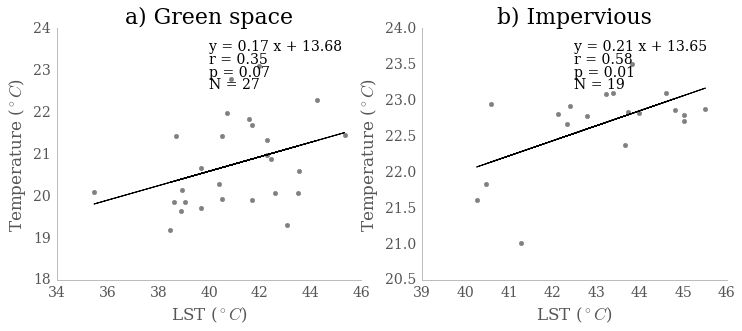

In [298]:
variable = 'LST'
plt.figure(figsize=[12,4.5])
m = 2# number of rows
# r,p = scipy.stats.pearsonr(parkdf[variable], parkdf['AirTemp'])
plt.subplot(1,2,1)
# plt.scatter( parkdf[variable], parkdf['AirTemp'])
# #plt.legend(['$r=$%.2f'%r])
# plt.annotate('$r=$%.2f'%r, xy=(.8, .9), xycoords ='axes fraction')
# plt.annotate('$p=$%.3f'%p, xy=(.8, .8), xycoords ='axes fraction')

# plt.xlabel(variable + ' (' + units[variable]+ ')')
easy_scatter(parkdf[variable], 
             parkdf['AirTemp'],
             string.ascii_lowercase[n-1] + ')', 
             variable + ' (' + units[variable]+ ')', 
             'Temperature ($^\circ C$)')


prettify_plot()

plt.subplot(1,2,2)
# r,p = scipy.stats.pearsonr( nonparkdf[variable], nonparkdf['AirTemp'])

# plt.scatter( nonparkdf[variable], nonparkdf['AirTemp'],)
# #plt.legend(['$r=$%.2f'%r])
# plt.annotate('$r=$%.2f'%r,xy=(.8, .9), xycoords ='axes fraction')
# plt.annotate('$p=$%.3f'%p, xy=(.8, .8), xycoords ='axes fraction')
# plt.xlabel(variable + ' (' + units[variable]+ ')')

easy_scatter(nonparkdf[variable], 
                 nonparkdf['AirTemp'],
                 string.ascii_lowercase[n-1] + ')', 
                 variable + ' (' + units[variable]+ ')', 
                 'Temperature ($^\circ C$)')

prettify_plot()
    
plt.subplot(1,2,1)
plt.ylabel('Temperature ($^\circ C$)')  
plt.subplot(1,2,2)
plt.ylabel('Temperature ($^\circ C$)')    

plt.subplot(1,2,1)
plt.title('a) Green space')

plt.subplot(1,2,2)
plt.title('b) Impervious')
plt.savefig('plots/lstvstair.pdf', dpi = 300)

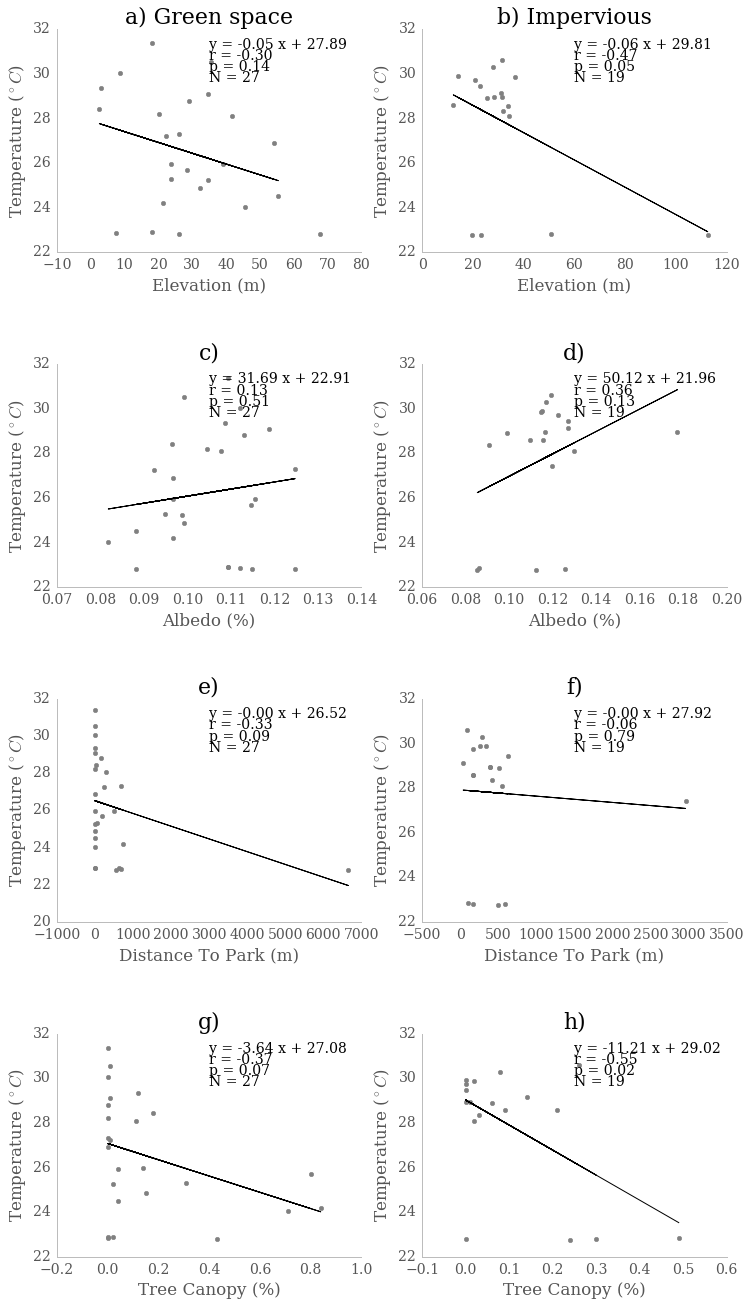

In [520]:
mean_temp = tempDF[selected].resample('D').max().mean()

# separate sensors into types 
ebaltsensorsi = np.where(meta['location:Longitude']>= -76.6125831)#-76.61)# -76.6072591 )
parksi = np.where((meta['landcoverclass'] != 'impervious') & (meta['location:Longitude']>= -76.6125831)) # -76.61) )

parksensors = meta.index[parksi]#meta.sensornumber.iloc[parksi]
ebaltsensors = meta.index[ebaltsensorsi]# meta.sensornumber.iloc[ebaltsensorsi]
nonparks = np.setdiff1d(ebaltsensors, parksensors)

##### Compute non-parks data 
nn = np.intersect1d(selected,nonparks)
indices = np.zeros(nn.shape)
i = 0
for n in nn: 
    indices[i] = np.where(selected == n)[0]
    i = i+1
indices = indices.astype(int)
nonparks_selected = np.intersect1d(nonparks, selected[indices])

nonparkdf = pd.DataFrame({"AirTemp":  mean_temp.loc[nonparks_selected], "Elevation": elevation[indices], 
                   "LST": LST[indices], "Distance To Park": distance_to_park[indices], 
                   "Albedo": alb[indices], #"inPark":parkyesno[indices], 
                  #"trees10ft": tree_cover[indices],# "trees20ft": tree_cover20ft[indices], "trees50ft": tree_cover50ft[indices], 
                   "Tree Canopy": tree_cover100ft[indices],# "trees500ft": tree_cover500ft[indices]
                         })

##### Compute parks data 
nn = np.intersect1d(selected,parksensors)
indices = np.zeros(nn.shape)
i = 0
for n in nn: 
    indices[i] = np.where(selected == n)[0]
    i = i+1
indices = indices.astype(int)
parks_selected = np.intersect1d(parksensors.values, selected[indices])

parkdf = pd.DataFrame({"AirTemp":  mean_temp.loc[parks_selected], "Elevation": elevation[indices], 
                   "LST": LST[indices], "Distance To Park": distance_to_park[indices], 
                   "Albedo": alb[indices], #"inPark":parkyesno[indices], 
                  #"trees10ft": tree_cover[indices], "trees20ft": tree_cover20ft[indices], "trees50ft": tree_cover50ft[indices], 
                   "Tree Canopy": tree_cover100ft[indices], #"trees500ft": tree_cover500ft[indices]
                      })


parkdf.corr()

###### plot 
import string
plt.figure(figsize=[12,22])
n = 1
units = {'Elevation': 'm', 'LST': '$^\circ C$', 'Albedo': '%', 'Distance To Park': 'm', 'Tree Canopy': '%'}

for variable in ['Elevation','Albedo', 'Distance To Park', 'Tree Canopy']: # parkdf.columns: 
    r,p = scipy.stats.pearsonr( parkdf[variable], parkdf['AirTemp'])
    plt.subplot(4,2,n)

    easy_scatter(parkdf[variable], 
                 parkdf['AirTemp'],
                 string.ascii_lowercase[n-1] + ')', 
                 variable + ' (' + units[variable]+ ')', 
                 'Temperature ($^\circ C$)')
    prettify_plot()
    
    plt.subplot(4,2,n+1)
    easy_scatter(nonparkdf[variable], 
                 nonparkdf['AirTemp'],
                 string.ascii_lowercase[n] + ')', 
                 variable + ' (' + units[variable]+ ')', 
                 'Temperature ($^\circ C$)')
    
    prettify_plot()

    n = n+2  
    
plt.subplot(4,2,1)
plt.title('a) Green space')

plt.subplot(4,2,2)
plt.title('b) Impervious')
plt.savefig('plots/geographiccorrelationsTMAX.pdf', dpi = 300)

In [544]:
alb

array([ 0.10812902,  0.12472778,  0.08821531,  0.08180994,  0.09928593,
        0.086049  ,  0.1223564 ,  0.12725266,  0.08816305,  0.09890563,
        0.09222654,  0.0768203 ,  0.09608392,  0.09608392,  0.09511014,
        0.09661323,  0.11200841,  0.10734453,  0.12141455,  0.10958242,
        0.11947537,  0.10944992,  0.11200841,  0.11312909,  0.11312909,
        0.11312909,  0.11456776,  0.09408902,  0.11562906,  0.11248272,
        0.10940957,  0.08311384,  0.12295181,  0.08924311,  0.11479191,
        0.09881041,  0.10323407,  0.10936608,  0.0763727 ,  0.1005398 ,
        0.115526  ,  0.0739876 ,  0.1195814 ,  0.1132301 ,  0.09103047,
        0.0908627 ,  0.12697781,  0.09573386,  0.11695317,  0.08105124,
        0.12378852,  0.0967261 ,  0.12472778,  0.10873309,  0.11505923,
        0.10944992,  0.10944992,  0.11297217,  0.11474636,  0.1046102 ,
        0.09162339,  0.11020343,  0.0897723 ,  0.0853449 ,  0.11886992,
        0.11968752,  0.08748927,  0.17743541,  0.09464752,  0.11

In [553]:
df = pd.DataFrame({"AirTemp": tempDF[selected].resample('D').max().mean(),
                   "Elevation": elevation, 
                   "LST": LST, "park_distance": distance_to_park, 
                   "albedo": alb, 
                  #"trees10ft": tree_cover, #"trees20ft": tree_cover20ft, "trees50ft": tree_cover50ft, 
                   "trees100ft": tree_cover100ft, #"trees500ft": tree_cover500ft
                  })
df.corr()

,AirTemp,Elevation,LST,albedo,park_distance,trees100ft
AirTemp,1.000000,-0.171737,0.195444,0.345985,NaN,-0.340323
Elevation,-0.171737,1.000000,-0.552059,-0.450089,NaN,0.280260
LST,0.195444,-0.552059,1.000000,0.651100,NaN,-0.485919
albedo,0.345985,-0.450089,0.651100,1.000000,NaN,-0.490982
park_distance,NaN,NaN,NaN,NaN,NaN,NaN
trees100ft,-0.340323,0.280260,-0.485919,-0.490982,NaN,1.000000


In [635]:
# T_mean results: 
import statsmodels.formula.api as sm
df = pd.DataFrame({"AirTemp": tempDF[selected].resample('D').mean().mean(),
                   "Elevation": elevation, 
                   "LST": LST, "park_distance": distance_to_park, 
                   "albedo": alb, 
                  #"trees10ft": tree_cover, #"trees20ft": tree_cover20ft, "trees50ft": tree_cover50ft, 
                   "trees100ft": tree_cover100ft, #"trees500ft": tree_cover500ft
                  })
inPark = {'grass': 1, 'impervious': 0, 'dirt':1, 'grass impervious':0, 'grass impervious dirt': 0 }
parkyesno = np.array([inPark[x] for x in meta.loc[selected].landcoverclass])
df['InPark'] = parkyesno

result = sm.ols(formula="AirTemp ~ Elevation + trees100ft+ InPark", data=df).fit()
print(result.params)
print(result.summary())

Intercept     24.596371
Elevation     -0.003873
trees100ft    -1.723802
InPark        -2.240408
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                AirTemp   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.604
Method:                 Least Squares   F-statistic:                     42.73
Date:                Sun, 27 Nov 2016   Prob (F-statistic):           1.64e-16
Time:                        13:23:56   Log-Likelihood:                -118.65
No. Observations:                  83   AIC:                             245.3
Df Residuals:                      79   BIC:                             255.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------

In [632]:
df = pd.DataFrame({"AirTemp": tempDF[selected].resample('D').max().mean(),
                   "MinTemp": tempDF[selected].resample('D').min().mean(),
                   "Elevation": elevation, 
                   "LST": LST, "park_distance": distance_to_park, 
                   "albedo": alb, 
                  #"trees10ft": tree_cover, #"trees20ft": tree_cover20ft, "trees50ft": tree_cover50ft, 
                   "trees100ft": tree_cover100ft, #"trees500ft": tree_cover500ft
                  })
import statsmodels.formula.api as sm
inPark = {'grass': 1, 'impervious': 0, 'dirt':1, 'grass impervious':0, 'grass impervious dirt': 0 }
parkyesno = np.array([inPark[x] for x in meta.loc[selected].landcoverclass])
df['InPark'] = parkyesno

result = sm.ols(formula="AirTemp ~ Elevation + trees100ft+ C(InPark)", data=df).fit()
print(result.params)
print(result.summary())

Intercept         28.423326
C(InPark)[T.1]    -1.466445
Elevation         -0.004824
trees100ft        -2.503983
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                AirTemp   R-squared:                       0.186
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     6.021
Date:                Sun, 27 Nov 2016   Prob (F-statistic):           0.000954
Time:                        13:18:20   Log-Likelihood:                -191.47
No. Observations:                  83   AIC:                             390.9
Df Residuals:                      79   BIC:                             400.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]


In [301]:
import statsmodels.formula.api as sm
mean_temp = tempDF[selected].resample('D').min().mean()
df = pd.DataFrame({"AirTemp": mean_temp})
inPark = {'grass': 1, 'impervious': 0, 'dirt':1,
          'grass impervious':0, 'grass impervious dirt': 0 }
parkyesno = np.array([inPark[x] for x in meta.loc[selected].landcoverclass])
df['InPark'] = parkyesno

In [302]:
result = sm.ols(formula="AirTemp ~ C(InPark)", data=df).fit()
print(result.params)
print(result.summary())

Intercept         22.539610
C(InPark)[T.1]    -2.555318
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                AirTemp   R-squared:                       0.428
Model:                            OLS   Adj. R-squared:                  0.422
Method:                 Least Squares   F-statistic:                     66.67
Date:                Mon, 21 Nov 2016   Prob (F-statistic):           1.99e-12
Time:                        23:47:50   Log-Likelihood:                -158.15
No. Observations:                  91   AIC:                             320.3
Df Residuals:                      89   BIC:                             325.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------

In [ ]:
from windrose import WindroseAxes

# conn = sqlite3.connect('data/amazinggrace-weewx.sdb')
# amazinggracedf = pd.read_sql_query('SELECT * from archive', conn)
# amazinggracedf['dateTime']=pd.to_datetime(amazinggracedf['dateTime'], unit='s')
# amazinggracedf.outTemp = (amazinggracedf.outTemp-32)*5./9.
# amazinggracedf = amazinggracedf.set_index('dateTime')
# amazinggracedf.index = amazinggracedf.index - pd.DateOffset(hours  = 5)

startdate = '2016-06-24' 
enddate = '2015-06-25'
hour = 6

print(olinhalldf[olinhalldf.index.hour==6][startdate:enddate].windSpeed.mean() 
)
ax = WindroseAxes.from_ax()
ax.bar(olinhalldf[olinhalldf.index.hour==hour][startdate:enddate].windDir, olinhalldf[olinhalldf.index.hour==hour][startdate:enddate].windSpeed, normed=True, opening=0.8, edgecolor='white')
ax.set_legend()
plt.title('Olin Hall Summer windspeed, %i o\'clock'%hour)

# ax = WindroseAxes.from_ax()
# ax.bar(amazinggracedf[amazinggracedf.index.hour==hour][startdate:enddate].windDir, 
#        amazinggracedf[amazinggracedf.index.hour==hour][startdate:enddate].windSpeed, normed=True, opening=0.8, edgecolor='white')
# ax.set_legend()
# plt.title('Amazing Grace Summer windspeed, %i o\'clock'%hour)

hour = 16
ax = WindroseAxes.from_ax()
ax.bar(olinhalldf[olinhalldf.index.hour==hour][startdate:enddate].windDir, olinhalldf[olinhalldf.index.hour==hour][startdate:enddate].windSpeed, normed=True, opening=0.8, edgecolor='white')
ax.set_legend()
plt.title('Olin Hall Summer windspeed, %i o\'clock'%hour)

# ax = WindroseAxes.from_ax()
# ax.bar(amazinggracedf[amazinggracedf.index.hour==hour][startdate:enddate].windDir, 
#        amazinggracedf[amazinggracedf.index.hour==hour][startdate:enddate].windSpeed, normed=True, opening=0.8, edgecolor='white')
# ax.set_legend()
# plt.title('Amazing Grace Summer windspeed, %i o\'clock'%hour)

for variable in ['outTemp', 'windSpeed', 'pressure', 'outHumidity', 'radiation', 'windDir']:
    diff = amazinggracedf[startdate:enddate][variable].resample('D', how= 'mean') - olinhalldf[startdate:enddate][variable].resample('D', how= 'mean')
    print variable, diff.mean()

In [9]:
n.max()

90

/Users/ascott47/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: .resample() is now a deferred operation
use .resample(...).mean() instead of .resample(...)
  from ipykernel import kernelapp as app


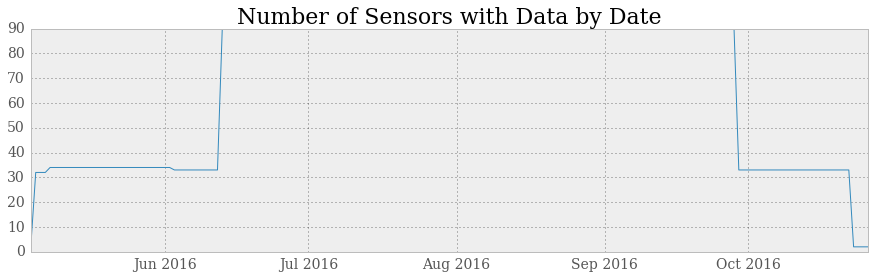

In [55]:
plt.figure(figsize=[15,4])
n = (~np.isnan(tempDF.resample('D'))).sum(axis=1)
plt.plot(n)
plt.title('Number of Sensors with Data by Date')

In [17]:
startdate = '2015-07-21'
print 'Downtown Station Mean', urbandf[startdate:enddate].TEMP.resample('D', how = 'min').mean()
#print 'BWI mean', df[startdate:enddate].TEMP.resample('D', how = 'min').mean()
print 'Olin Hall mean', olinhalldf[startdate:enddate].outTemp.resample('D', how = 'min').mean()
print 'Amazing Grace mean', amazinggracedf[startdate:enddate].outTemp.resample('D', how = 'min').mean()

Downtown Station Mean 21.1805970149
Olin Hall mean 18.1135986733
Amazing Grace mean 20.5406301824


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).min()
  from ipykernel import kernelapp as app
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).min()
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).min()


In [18]:
#tempDF[startdate:enddate].resample('D').min().mean().to_clipboard()